In [1]:
import numpy as np, pandas as pd
import joblib, os
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, classifiers, utils

In [ ]:
kwargs = dict(
	window_size=7,
    split=False,
	multiphase=True
)
X, y = utils.train_test_subjects_split(
    farseeing, **kwargs)

In [9]:
X.shape, y.shape, np.bincount(y)

((4056, 700), (4056,), array([3911,  145]))

In [10]:
# kwargs['tuned_threshold'] = True
trained_models, best_thresholds = classifiers.train_models(X, y, **kwargs)

⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. Rocket. Catch22. QUANT. ✅


In [33]:
# save models
os.makedirs('models', exist_ok=True)
models_and_thresholds = dict(
	models=trained_models,
	thresholds=best_thresholds
)
joblib.dump(models_and_thresholds, 'models/trained_models_full_farseeing.joblib')

['models/trained_models_full_farseeing.joblib']

In [12]:
mobilised_acc_t1 = pd.read_csv('data/mobilised/10073-acc-T1-MM-25052021.csv')
mobilised_acc_t2 = pd.read_csv('data/mobilised/10073-acc-T2-MM-24112021.csv')
mobilised_acc_t3 = pd.read_csv('data/mobilised/10073-acc-T3-MM-24052022.csv')
mobilised_acc_t4 = pd.read_csv('data/mobilised/10073-acc-T4-MM-22112022.csv')

In [14]:
acc_data = pd.concat([mobilised_acc_t1, mobilised_acc_t2, mobilised_acc_t3, mobilised_acc_t4])
acc_data['accel_mag'] = utils.magnitude(
    np.clip(acc_data.iloc[:,1:4], -2, 2))
acc_data['time'] = pd.to_datetime(acc_data['time'], unit='s')
acc_data = acc_data.set_index('time')
acc_data

acc_CC    acc_ML    acc_AP  accel_mag
time                                                                  
2021-05-08 00:00:00.163899904 -0.027344  0.993164  0.096680   0.990544
2021-05-08 00:00:00.173899776 -0.029297  0.989258  0.097656   0.986809
2021-05-08 00:00:00.183900160 -0.026367  0.985352  0.099609   0.983036
2021-05-08 00:00:00.193900032 -0.024414  0.989258  0.097656   0.986677
2021-05-08 00:00:00.203900160 -0.024414  0.988281  0.099609   0.985899
...                                 ...       ...       ...        ...
2022-11-15 23:59:59.754800128 -0.258789 -0.031250 -0.964844   0.991747
2022-11-15 23:59:59.765000192 -0.257813 -0.034180 -0.963867   0.990647
2022-11-15 23:59:59.775200000 -0.258789 -0.031250 -0.963867   0.990803
2022-11-15 23:59:59.785399808 -0.260742 -0.030273 -0.964844   0.992224
2022-11-15 23:59:59.795599872 -0.261719 -0.032227 -0.965820   0.993482

[239447675 rows x 4 columns]

<Axes: xlabel='time'>

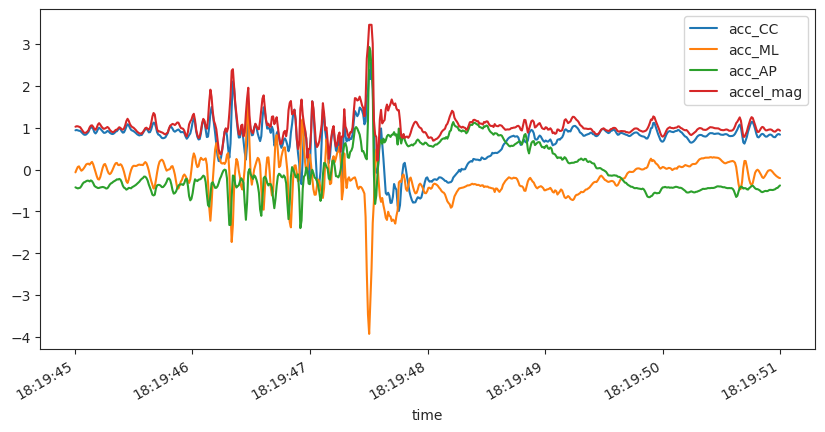

In [16]:
# Fall 1, May 9th 2021 at 18:19:47.504 on Day 2
fall_hour = acc_data.loc['2021-05-09 18:19:45':'2021-05-09 18:19:50']
fall_hour.plot(figsize=(10,5))

120055

<Axes: xlabel='time'>

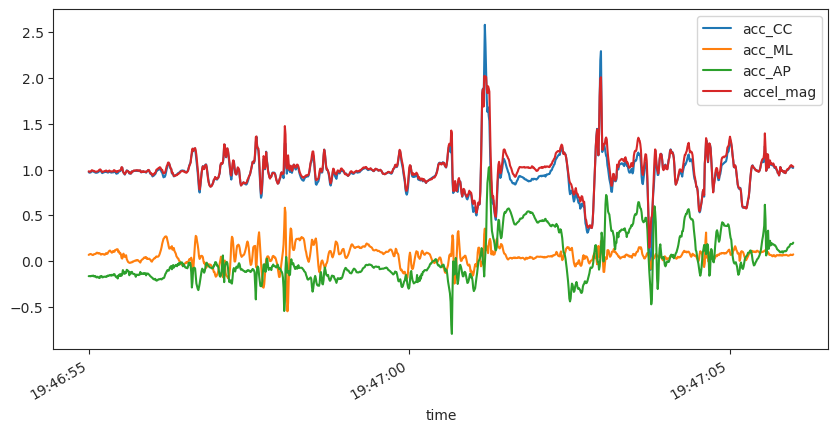

In [18]:
# Fall 2, May 12th 2021 at 19:47:01.184 on Day 5
fall_hour = acc_data.loc['2021-05-12 19:46:55':'2021-05-12 19:47:05']
fall_hour.plot(figsize=(10,5))

<Axes: xlabel='time'>

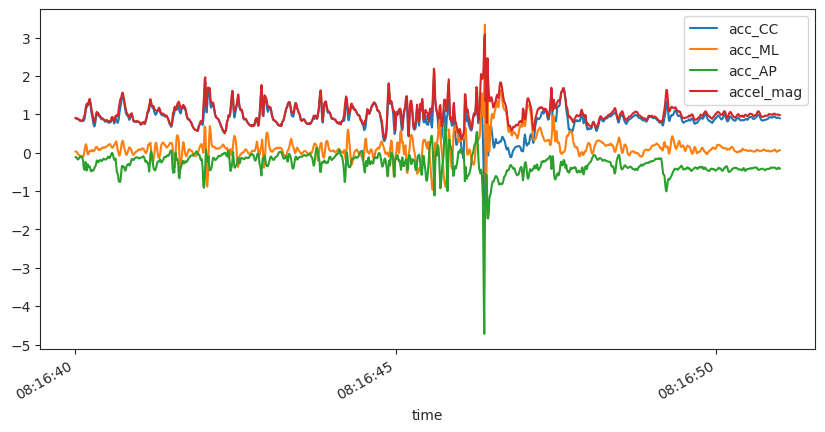

In [19]:
# Fall 2, May 14th 2021 at 08:16:46.374 on Day 5
fall_hour = acc_data.loc['2021-05-14 08:16:40':'2021-05-14 08:16:50']
fall_hour.plot(figsize=(10,5))

In [79]:
kwargs = dict(
	window_size=7,
    split=False,
	multiphase=True,
    plot = True,
    saved_models=None #'models/trained_models_full_farseeing.joblib'
)
if kwargs['saved_models'] is None:
	X, y = utils.train_test_subjects_split(farseeing, **kwargs)

In [86]:
# Augment data with mobilised data
non_fall_day = acc_data.loc['2021-05-10 10:00:00':'2021-05-10 11:00:00']['accel_mag']
kwargs.update(dict(step=1, thresh=1.4))
X_aug, y_aug = farseeing.get_adls(non_fall_day, **kwargs)
X_aug = np.concatenate([X, X_aug])
y_aug = np.concatenate([y, y_aug])
X_aug.shape, y_aug.shape, np.bincount(y_aug)

((4185, 700), (4185,), array([4040,  145]))

⏳ TRAINING QUANT. thresh: 0.09090909090909091 ✅
🔍 TESTING QUANT

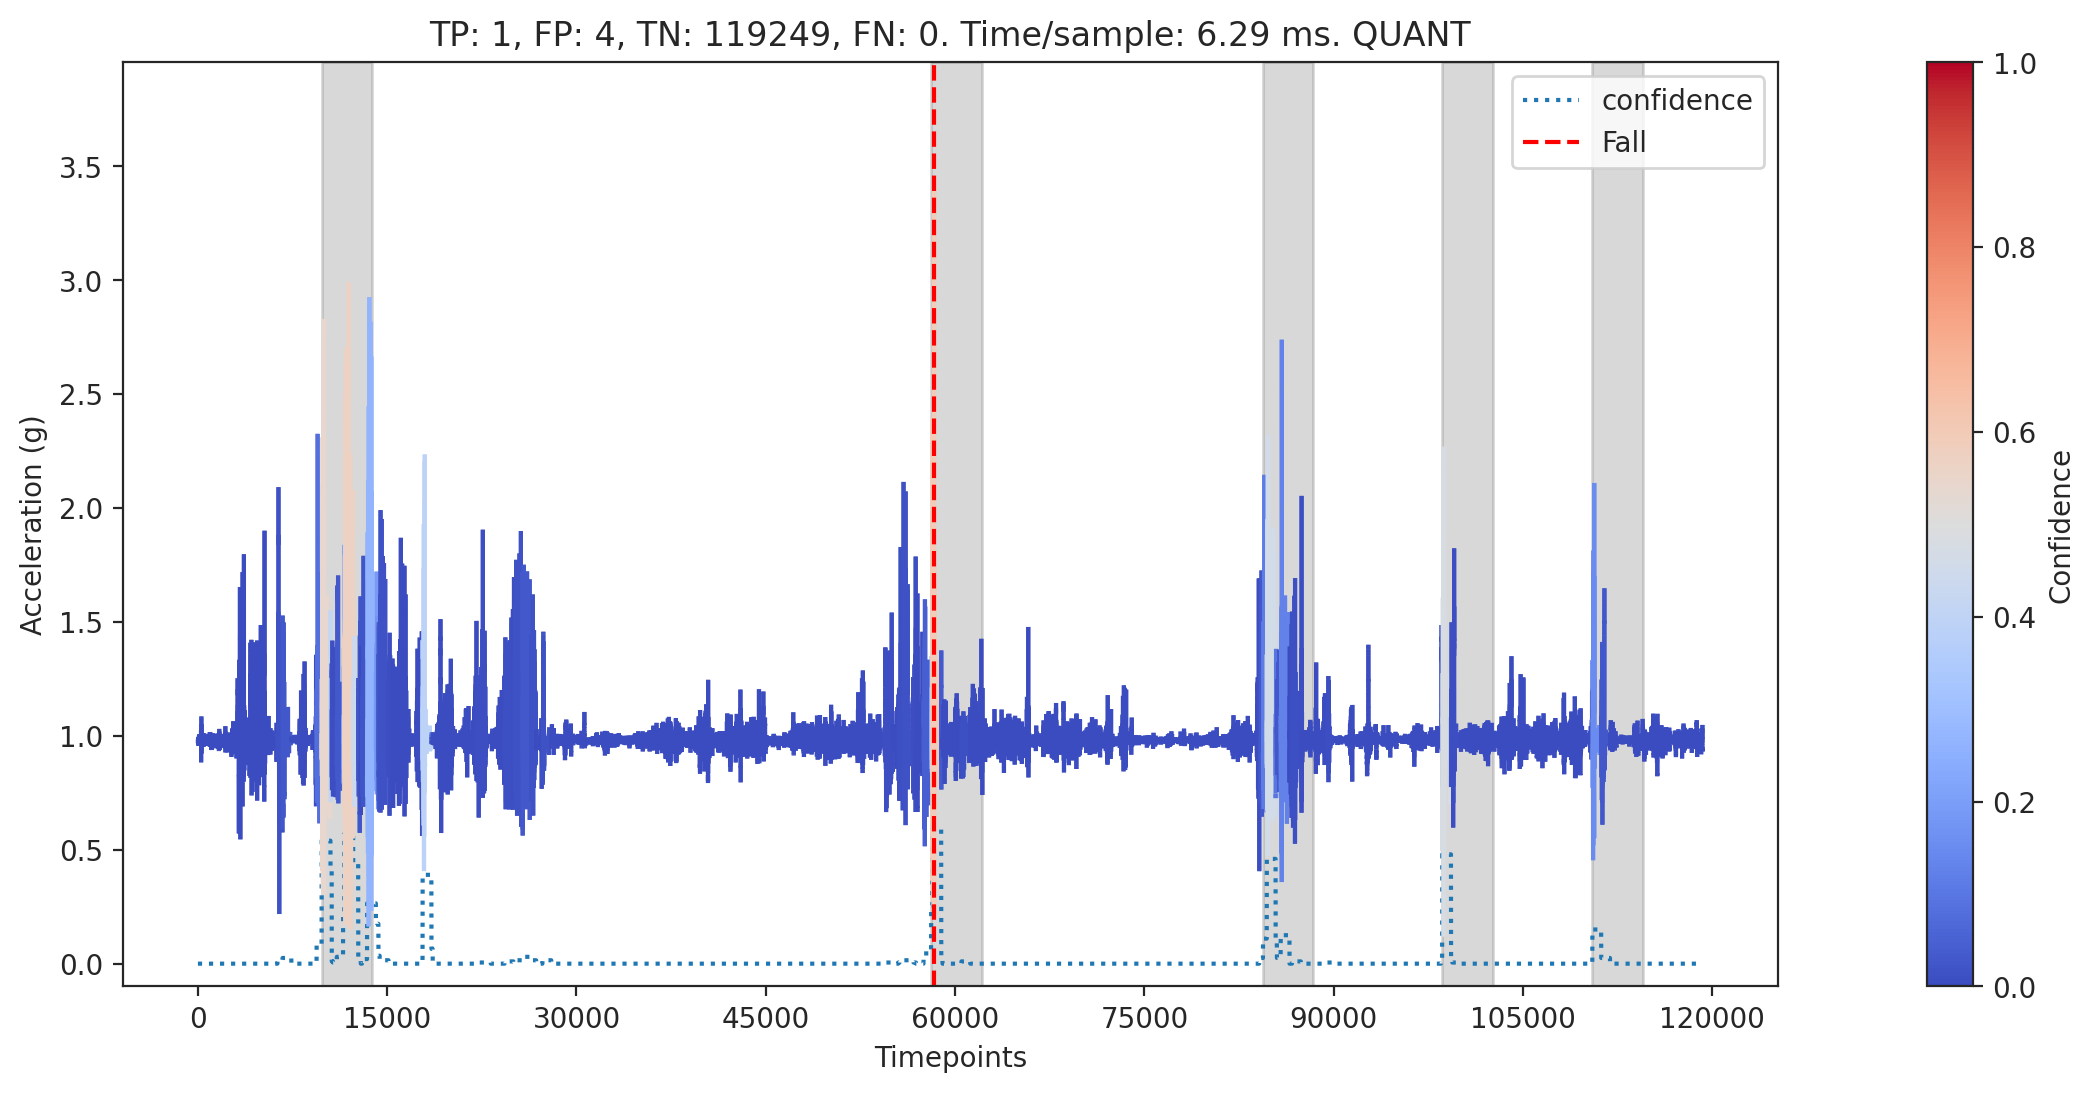

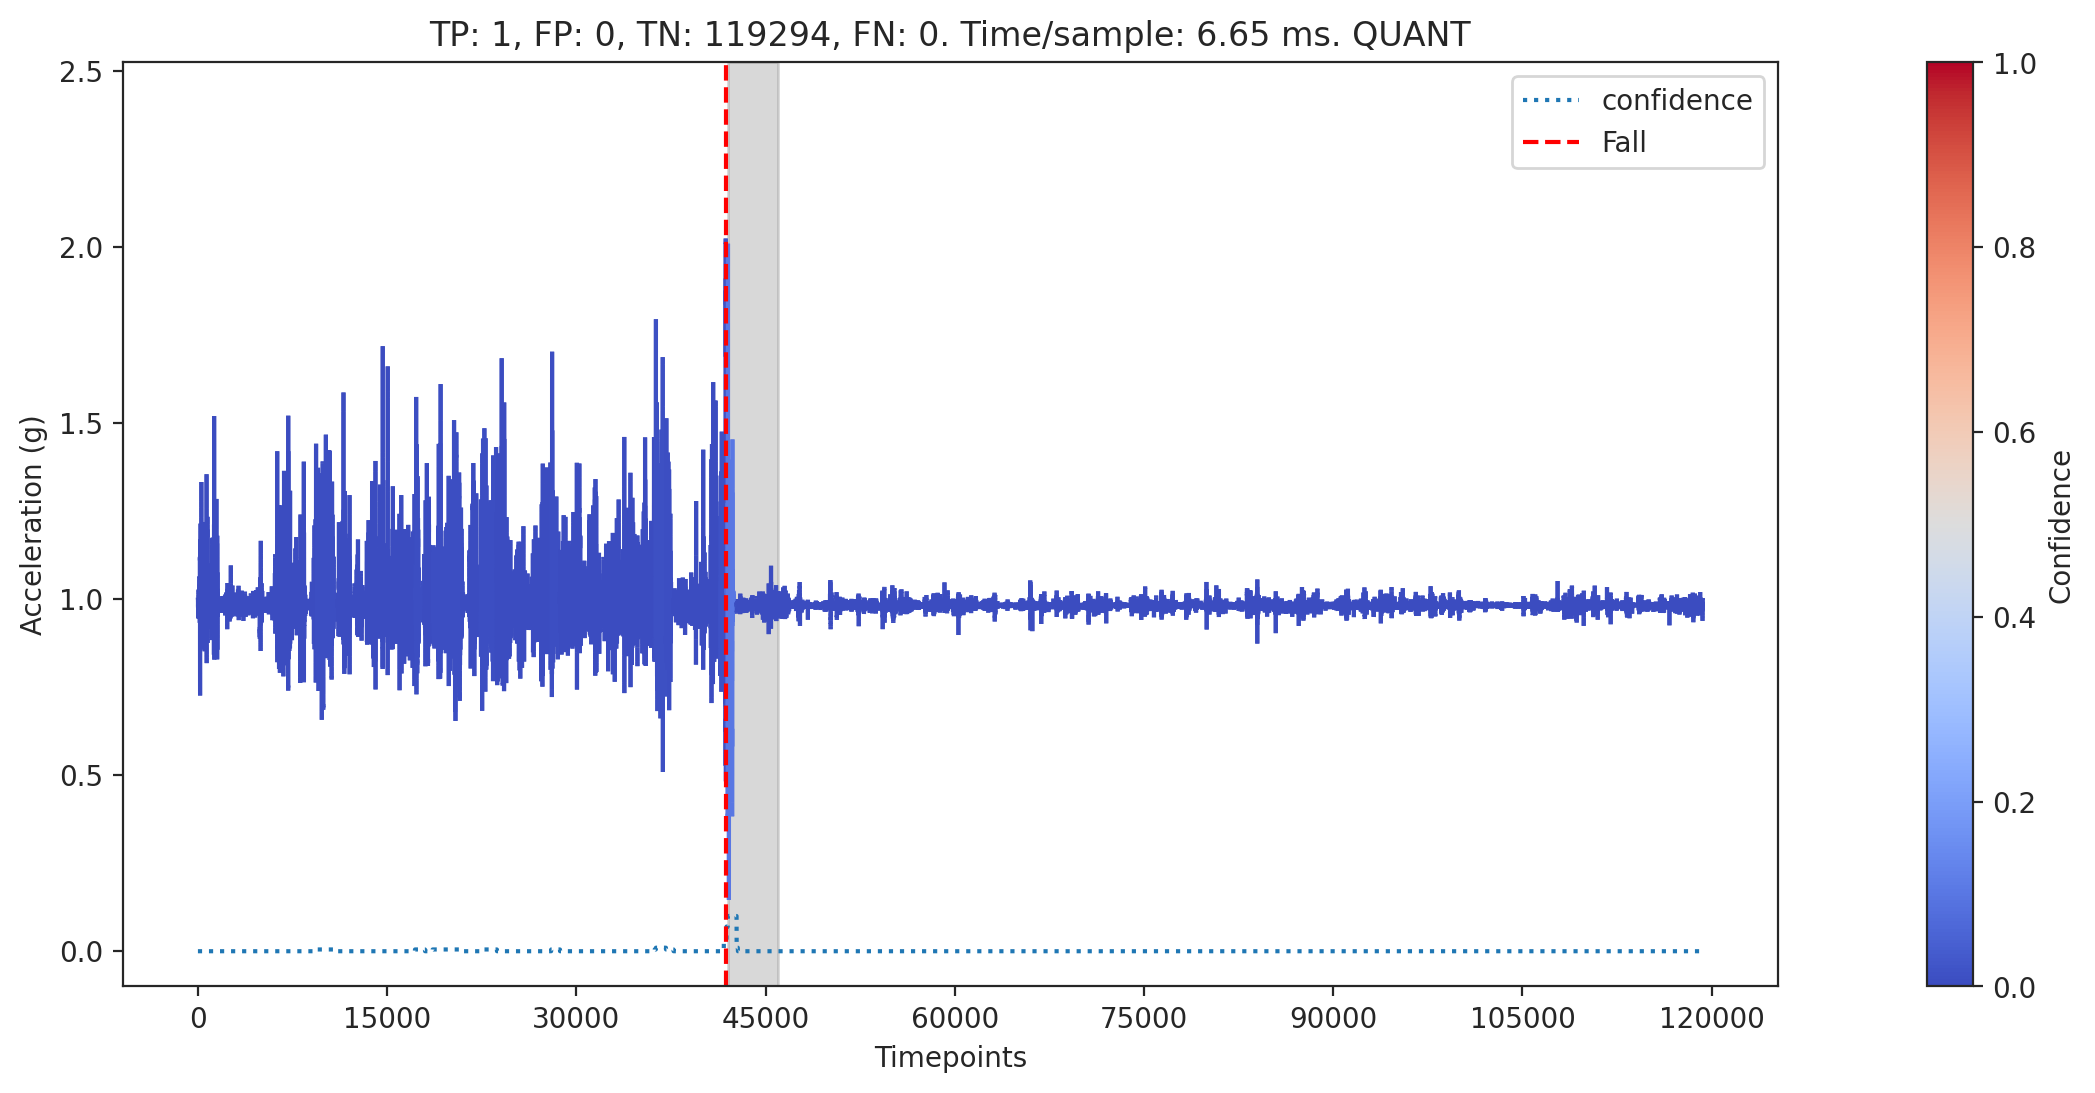

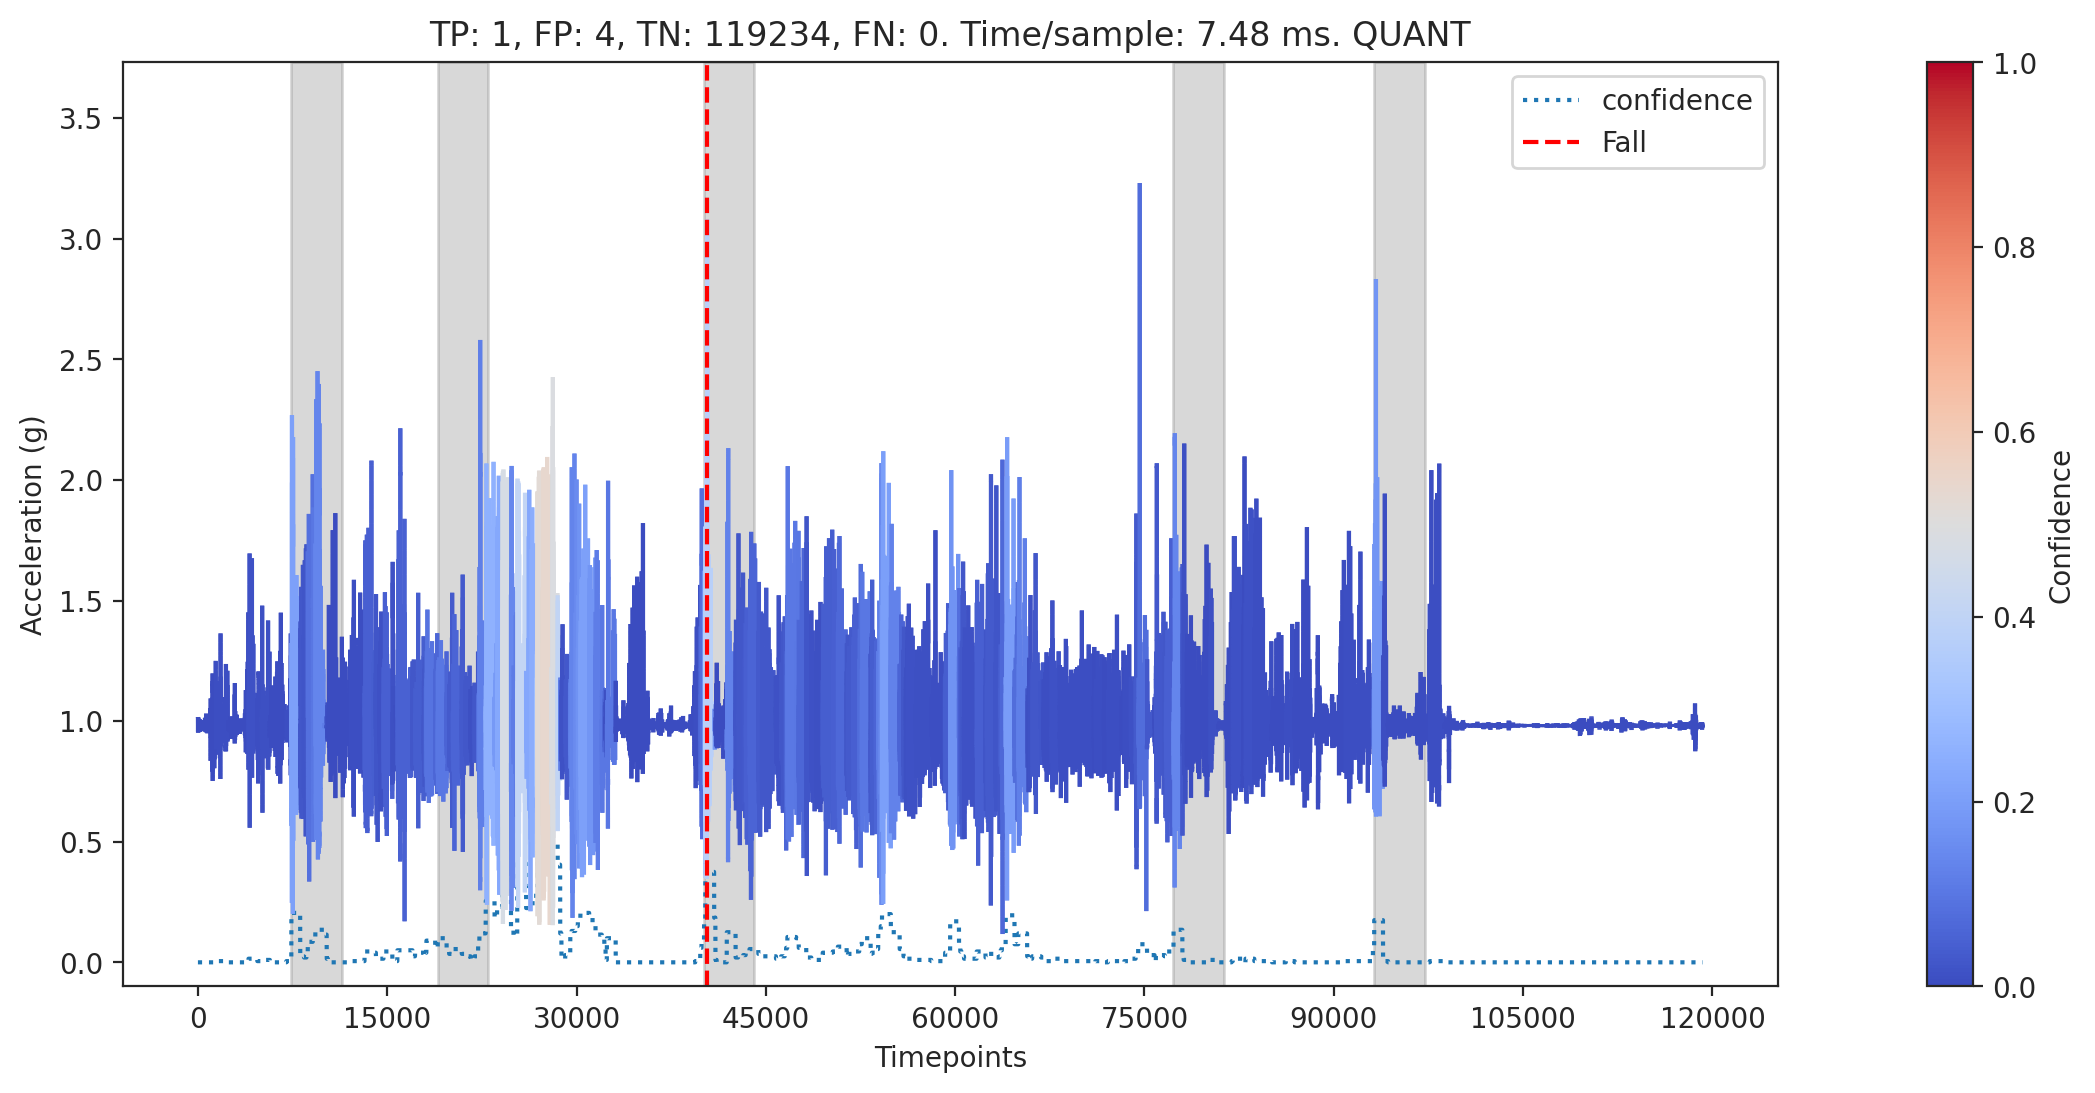

. Ensemble. ✅


In [ ]:
fall_hour1 = acc_data.loc['2021-05-09 18:09:00':'2021-05-09 18:29:00']
fall_hour2 = acc_data.loc['2021-05-12 19:37:00':'2021-05-12 19:57:00']
fall_hour3 = acc_data.loc['2021-05-14 08:06:00':'2021-05-14 08:26:00']
X_test = [list(fall_hour1['accel_mag'].values),
          list(fall_hour2['accel_mag'].values),
          list(fall_hour3['accel_mag'].values)]
y_test = [fall_hour1.index.get_loc('2021-05-09 18:19:47.504').start,
          fall_hour2.index.get_loc('2021-05-12 19:47:01.184').start,
		  fall_hour3.index.get_loc('2021-05-14 08:16:46.374').start]
kwargs.update(dict(tune_threshold=True, models_subset=['QUANT']))
metrics_df = classifiers.run_models(X, X_test, y, y_test, **kwargs)

In [95]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [91]:
metrics_df

model  window_size   runtime       auc  precision  recall  specificity  \
0     QUANT            7  7.480323  0.999989       0.27     1.0     0.999978   
1  Ensemble            7  7.480323  0.000000       0.00     0.0     0.000000   

   f1-score  false alarm rate  miss rate  
0  0.425197          8.049055        0.0  
1  0.000000          0.000000        0.0

⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. Rocket. Catch22. QUANT. ✅
🔍 TESTING LogisticCV

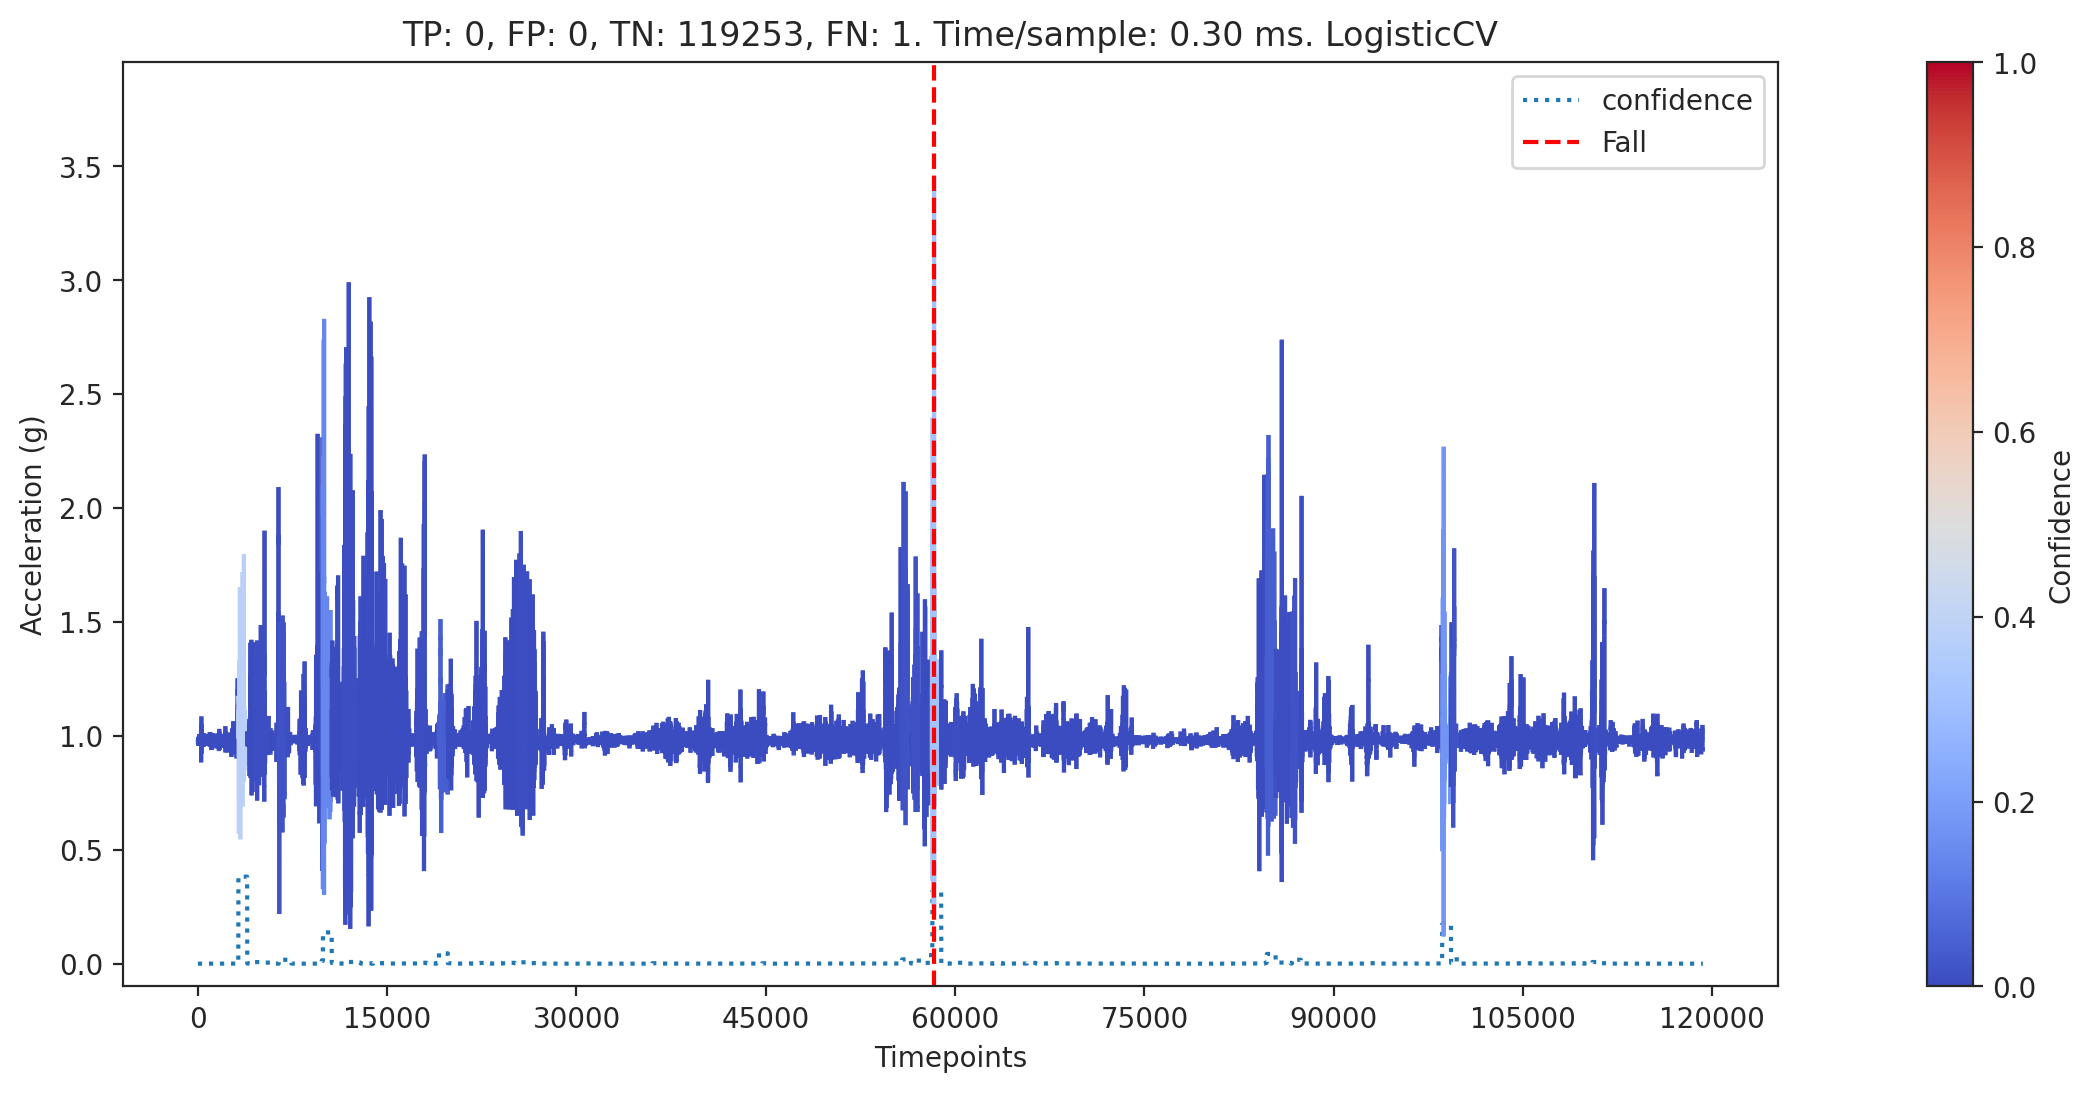

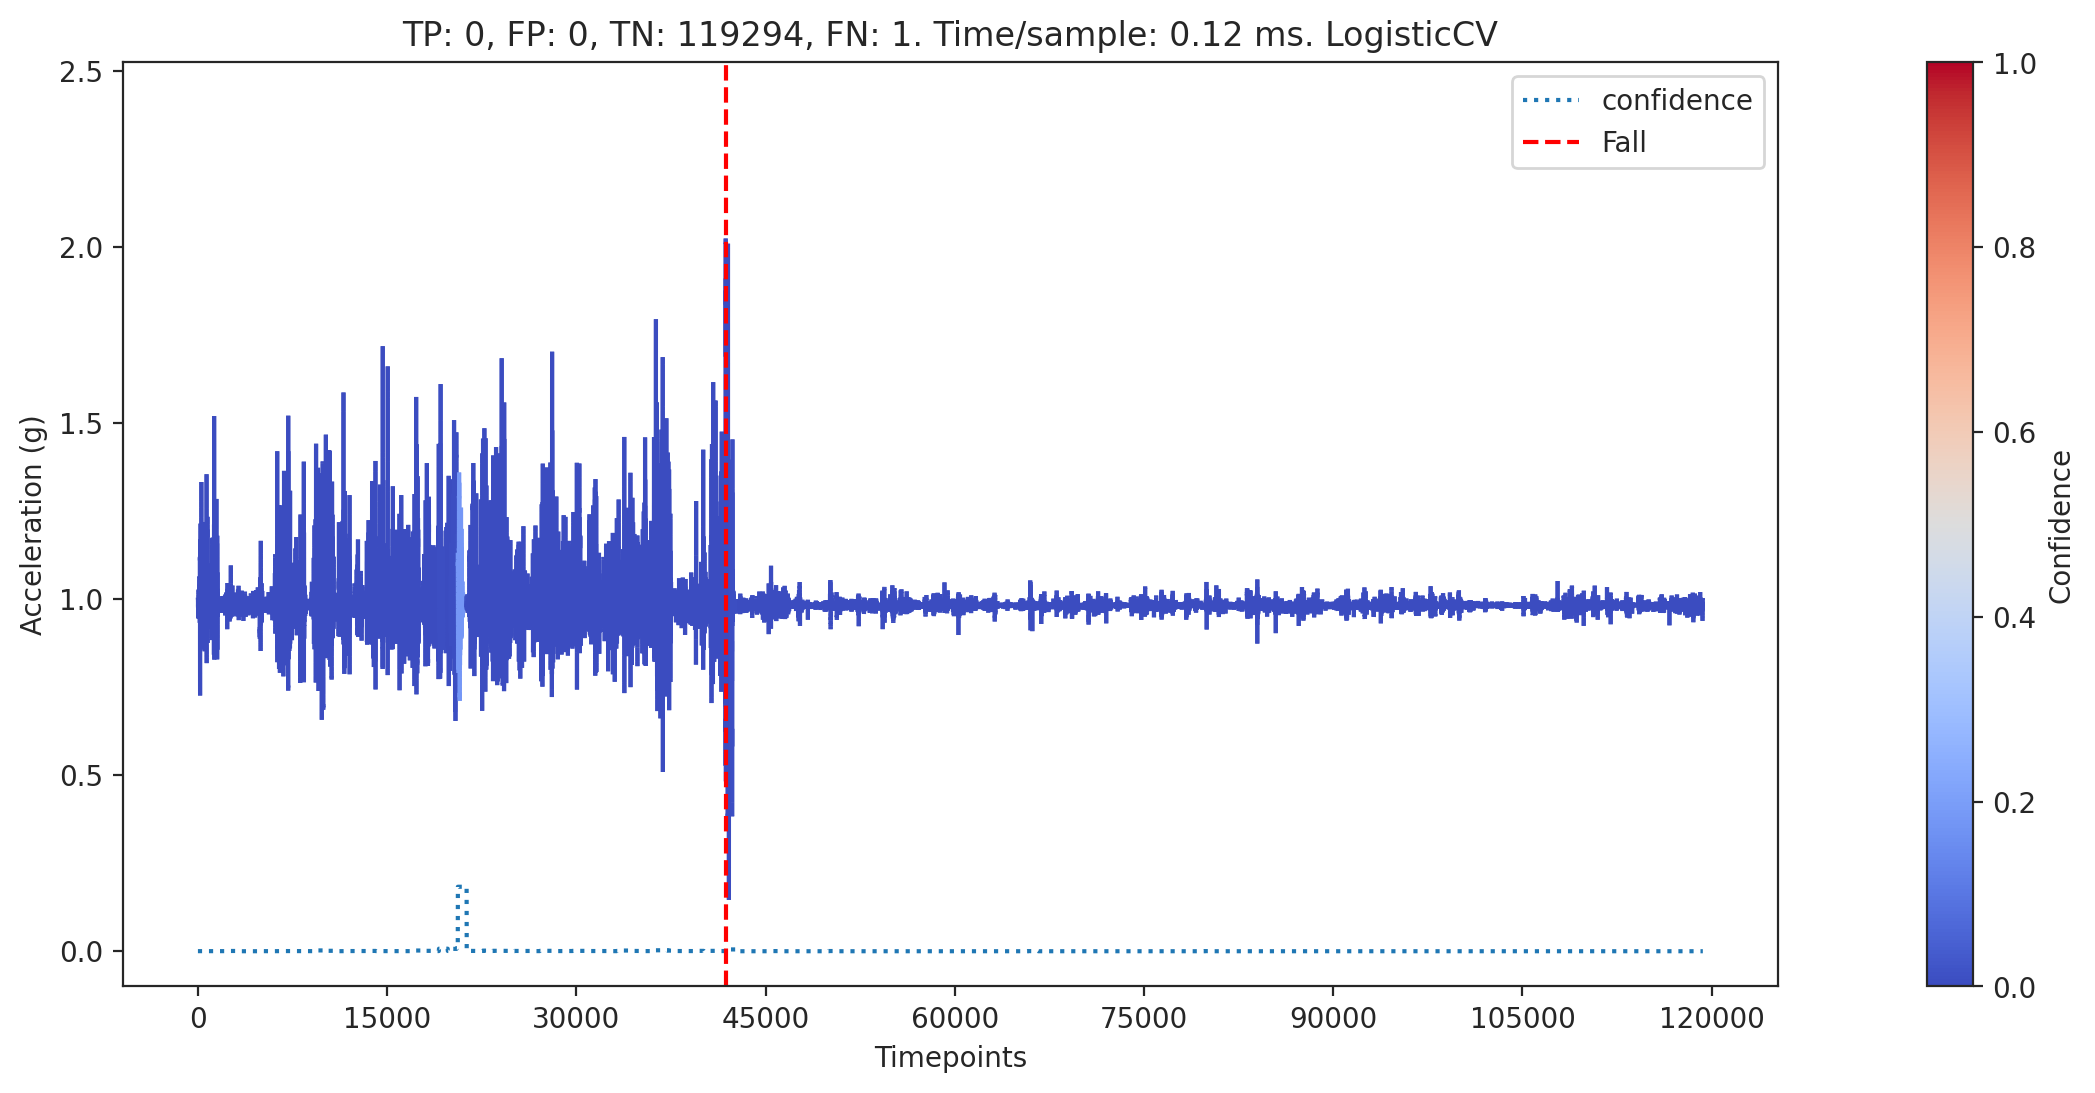

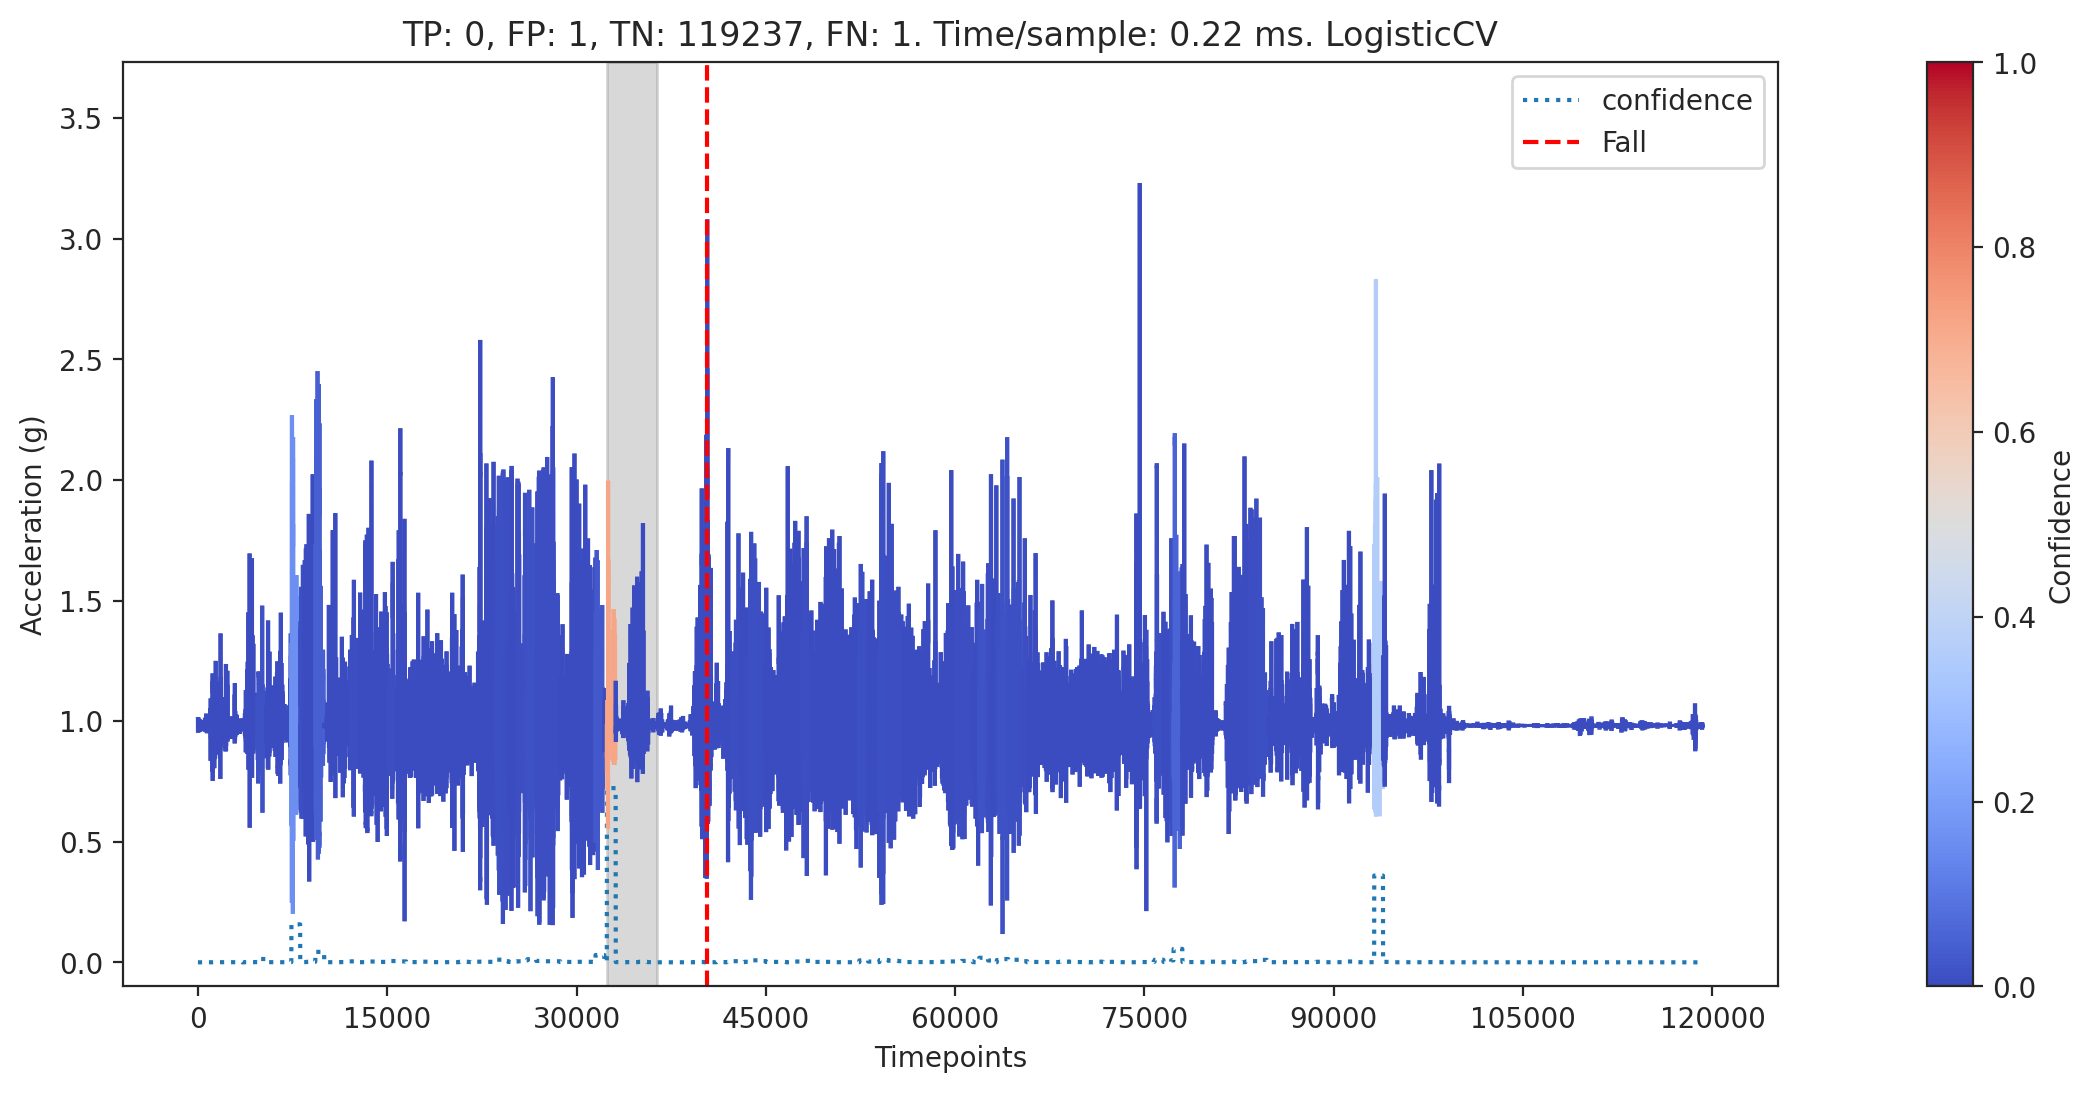

. RandomForest

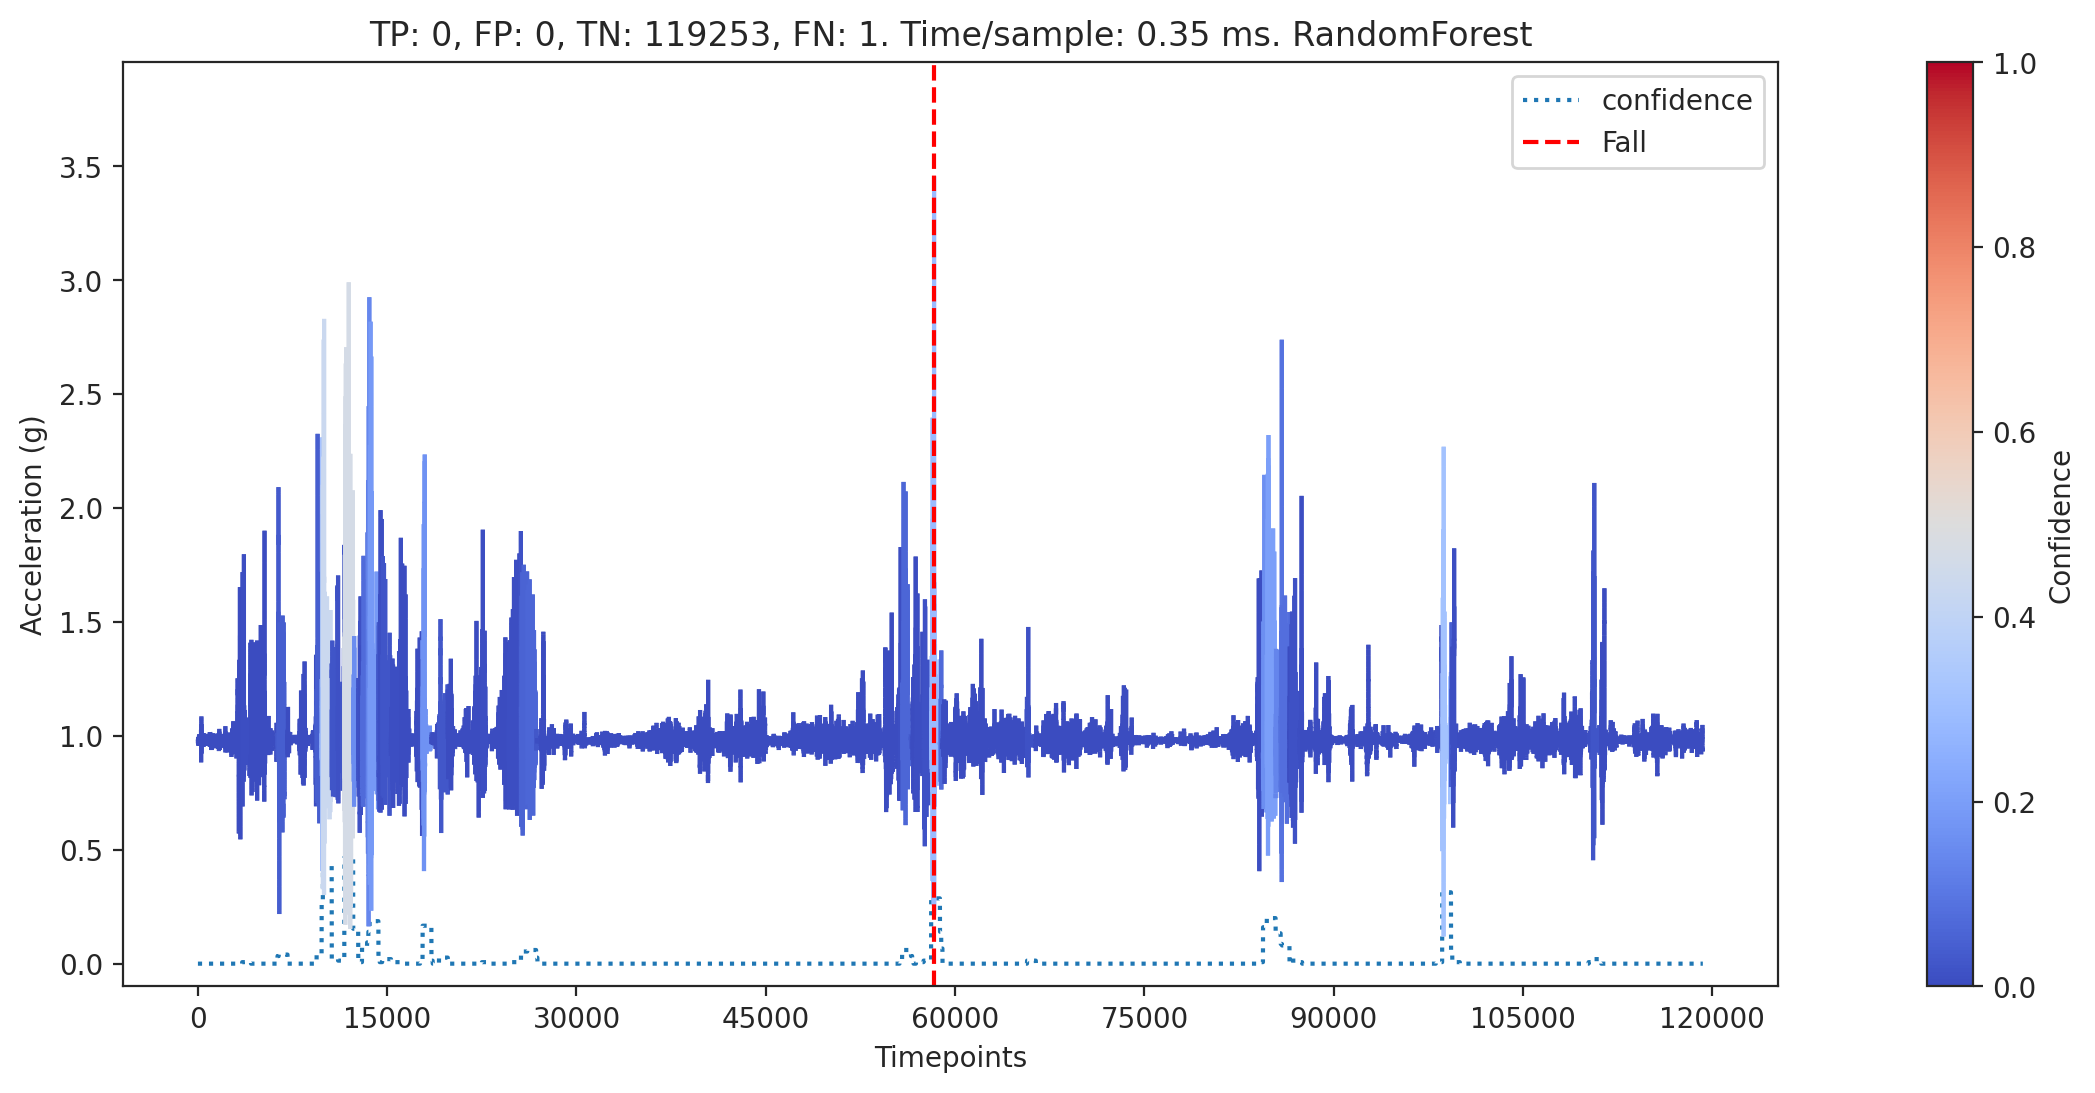

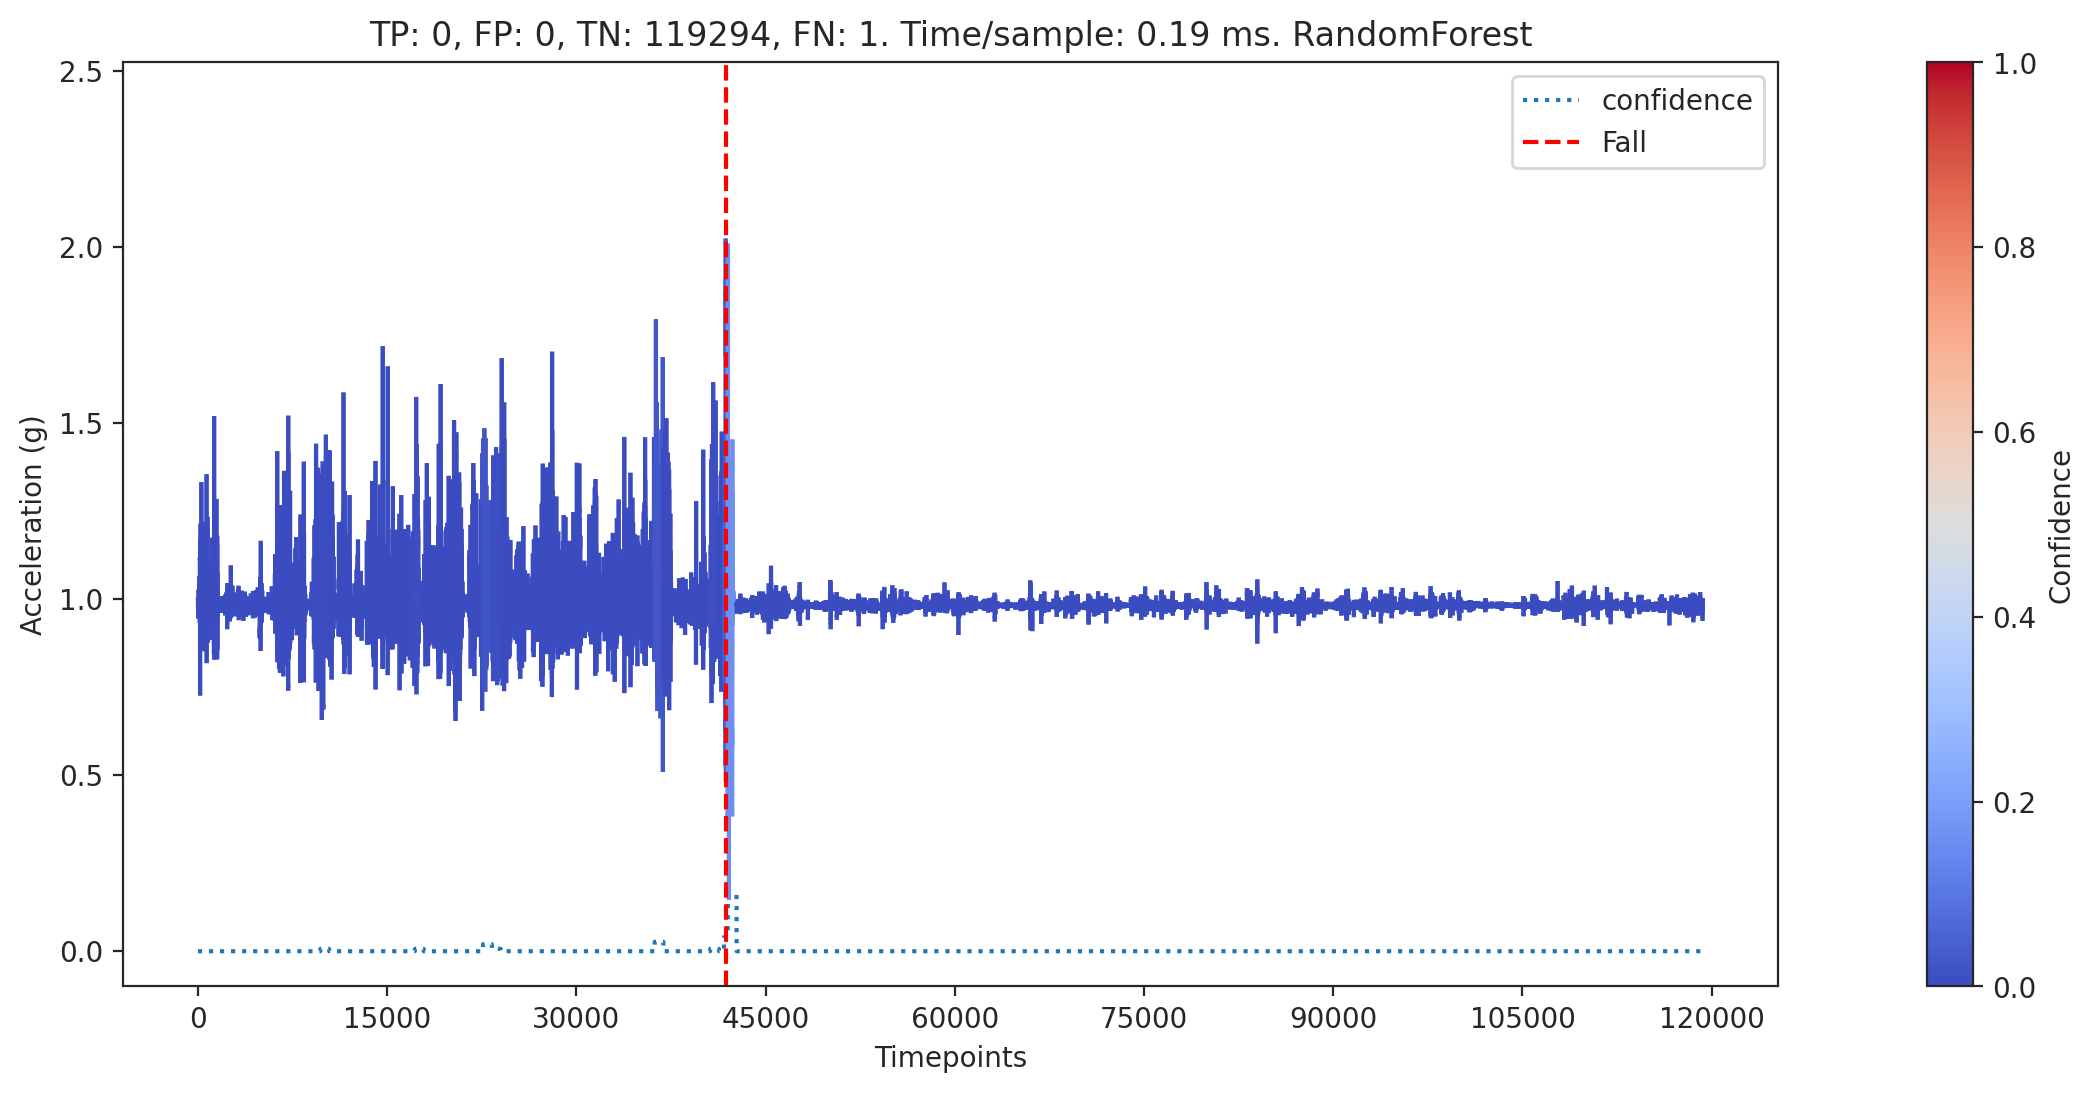

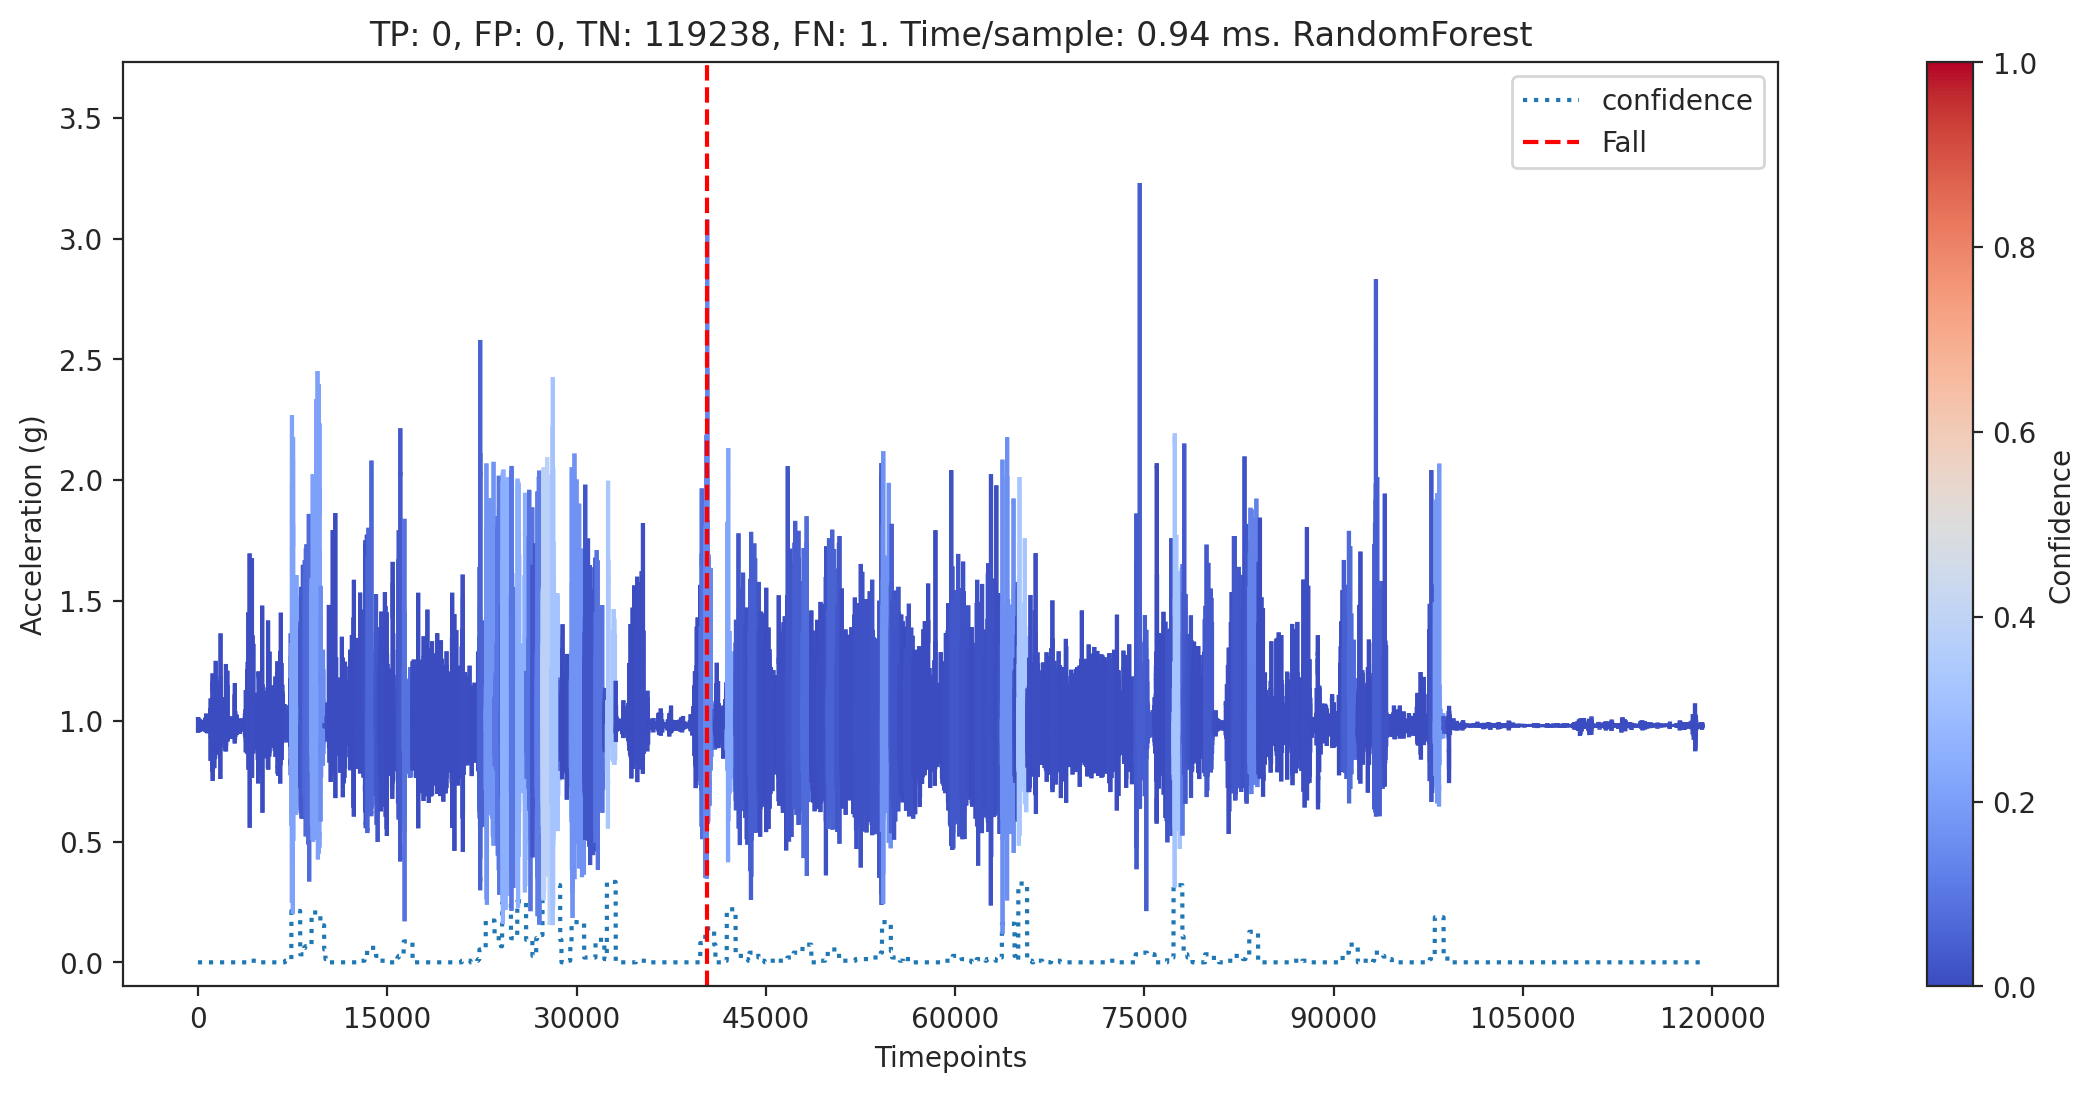

. ExtraTrees

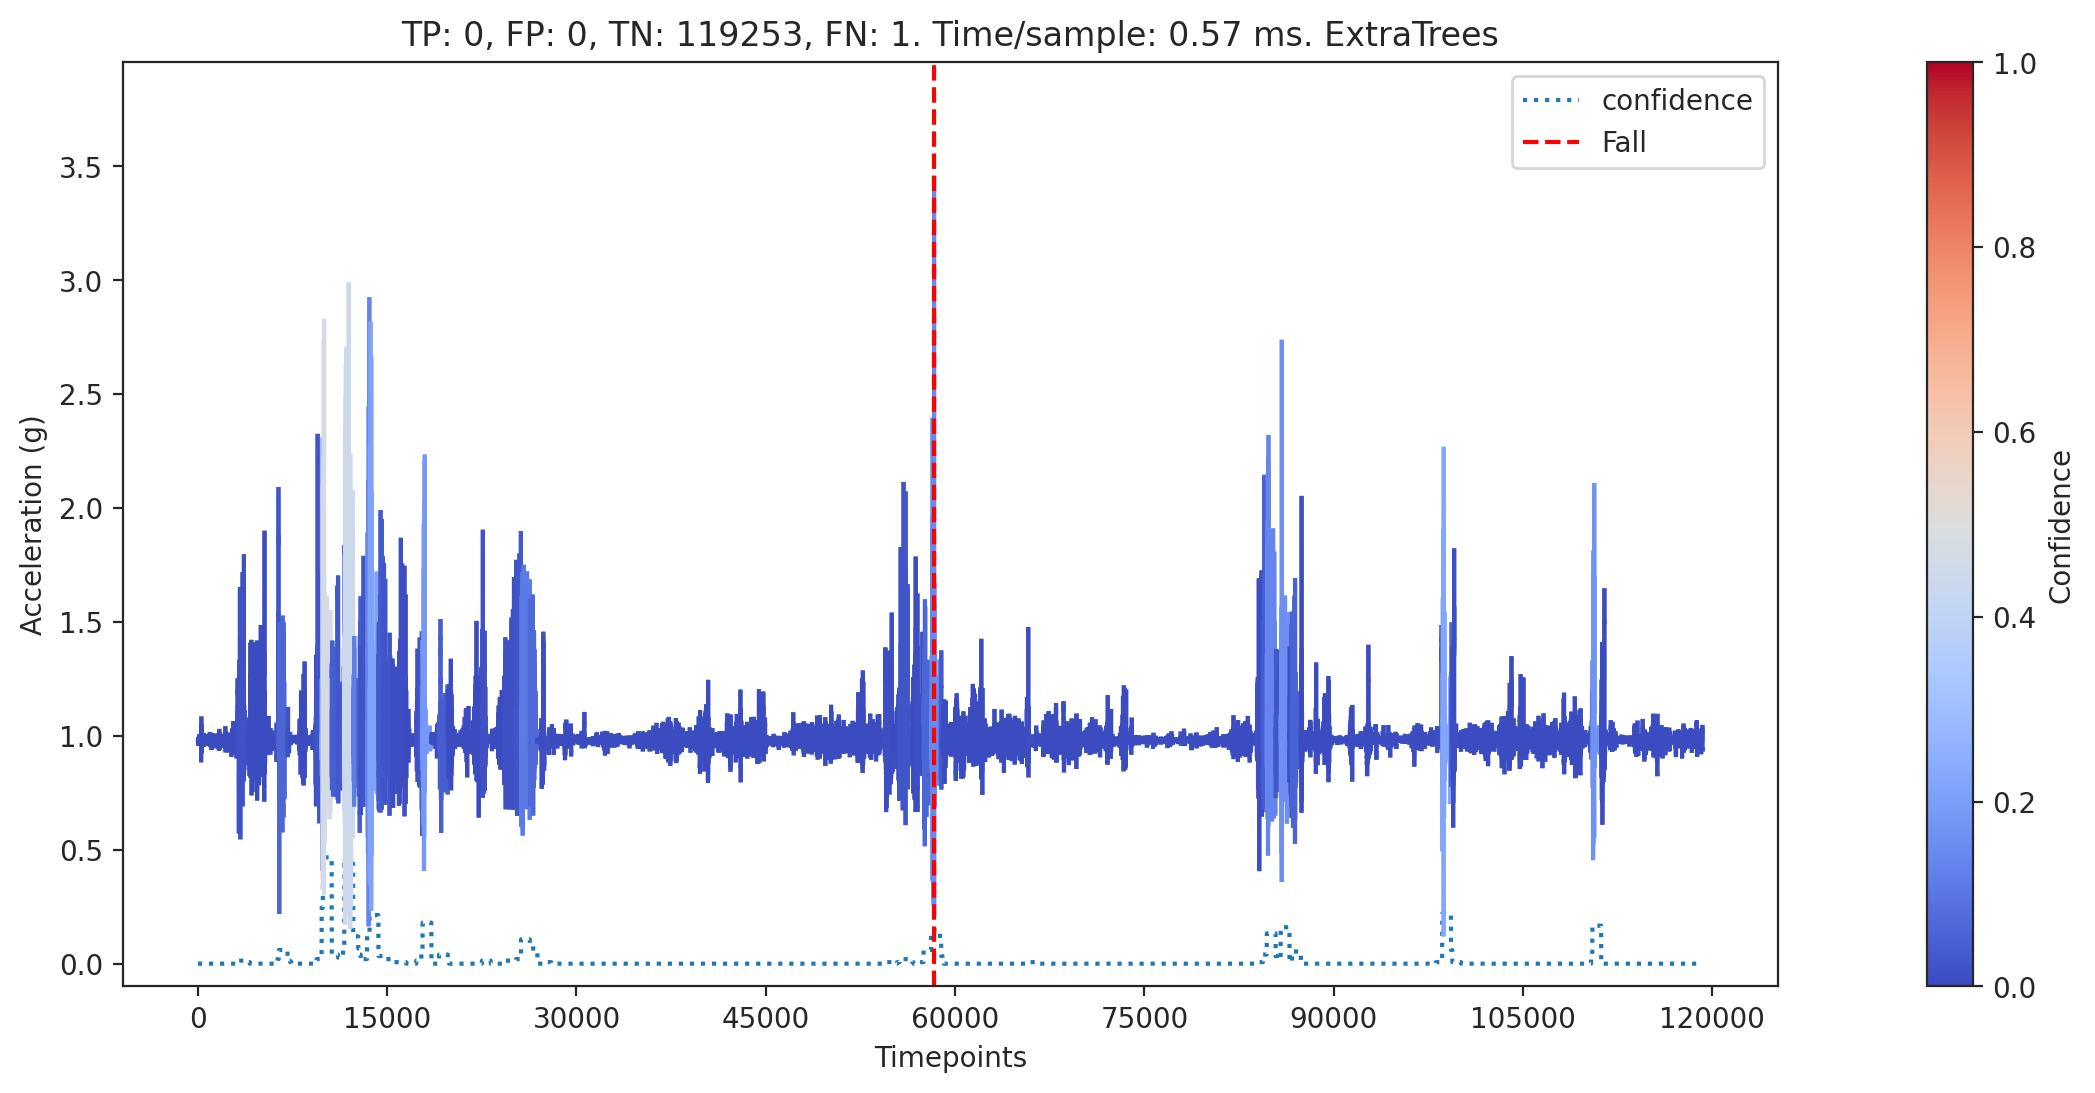

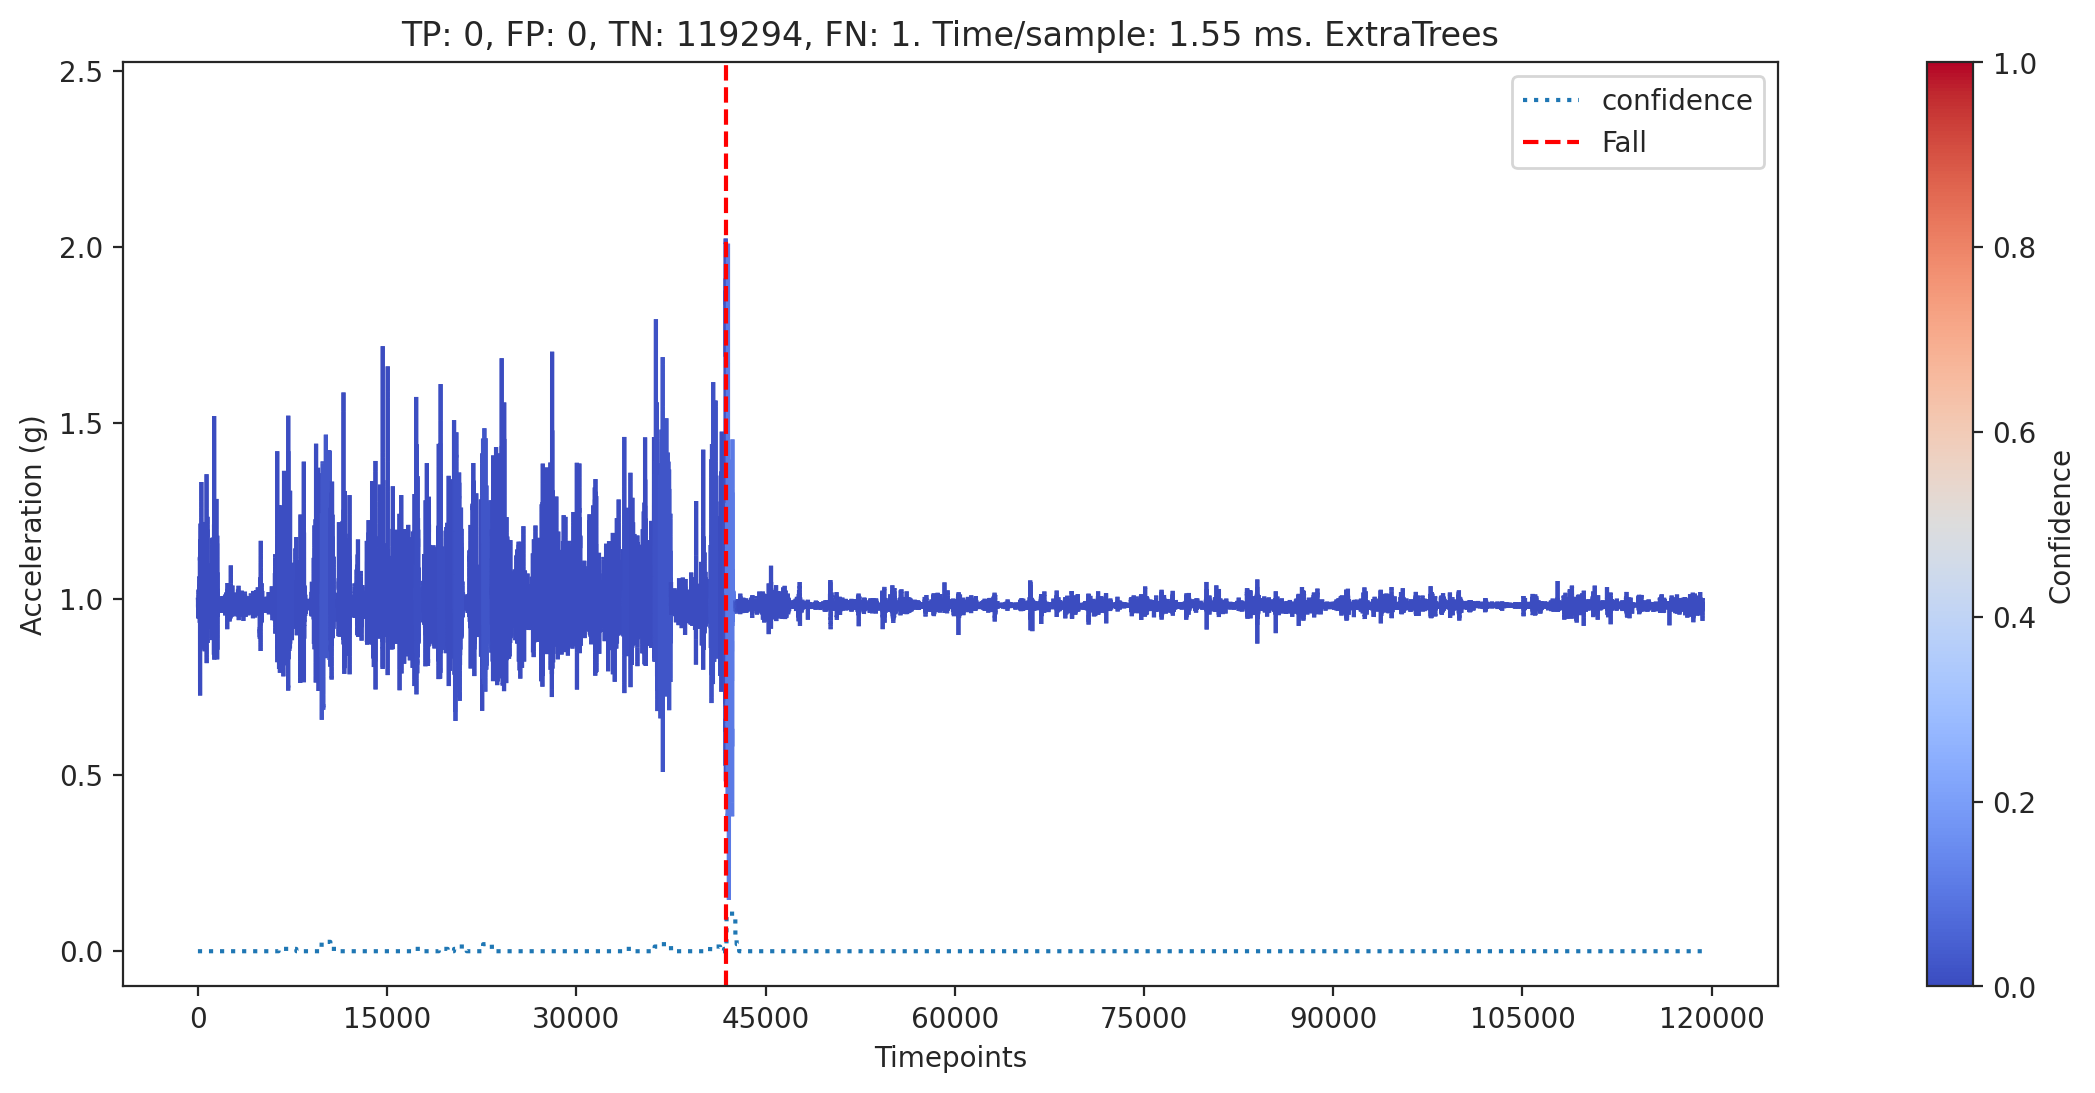

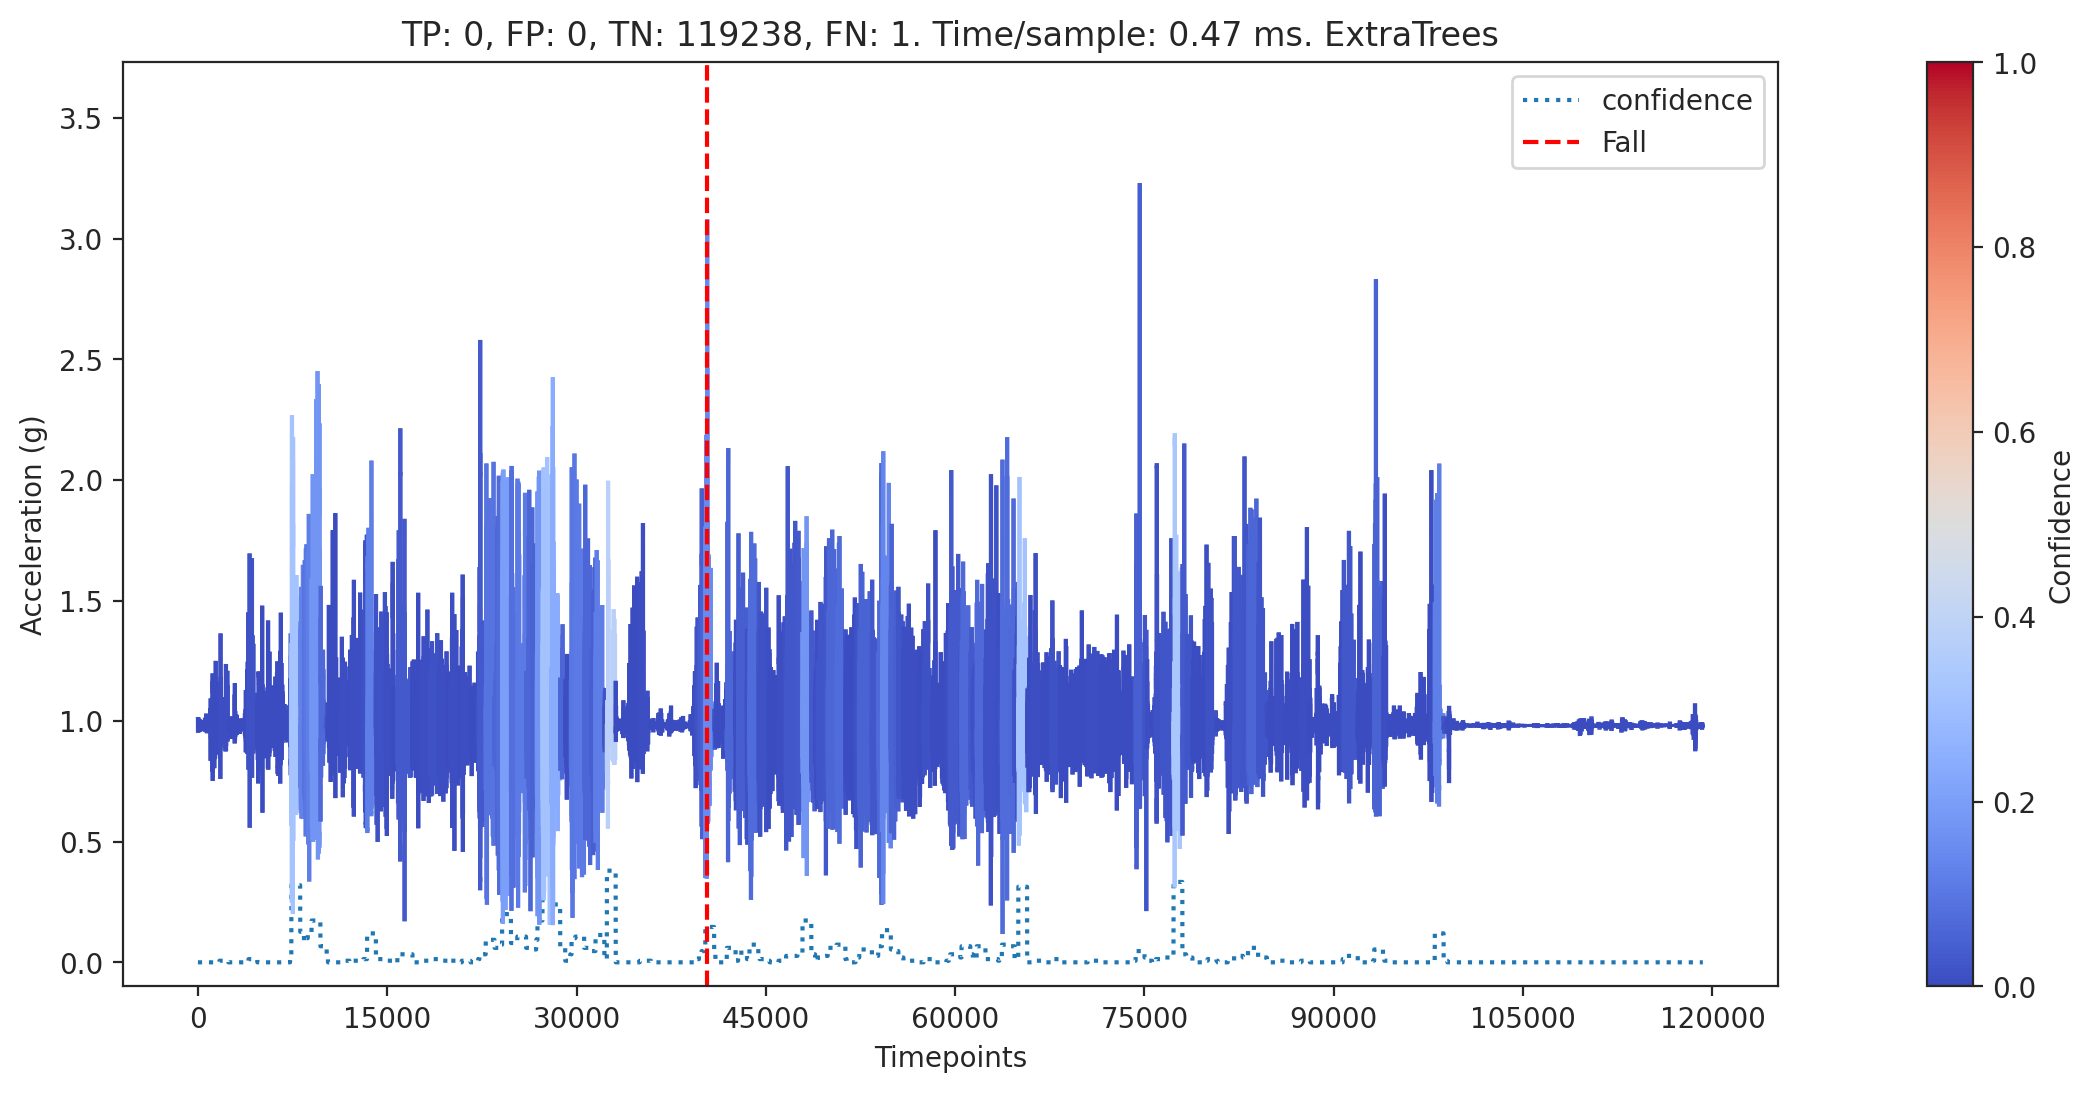

. Rocket

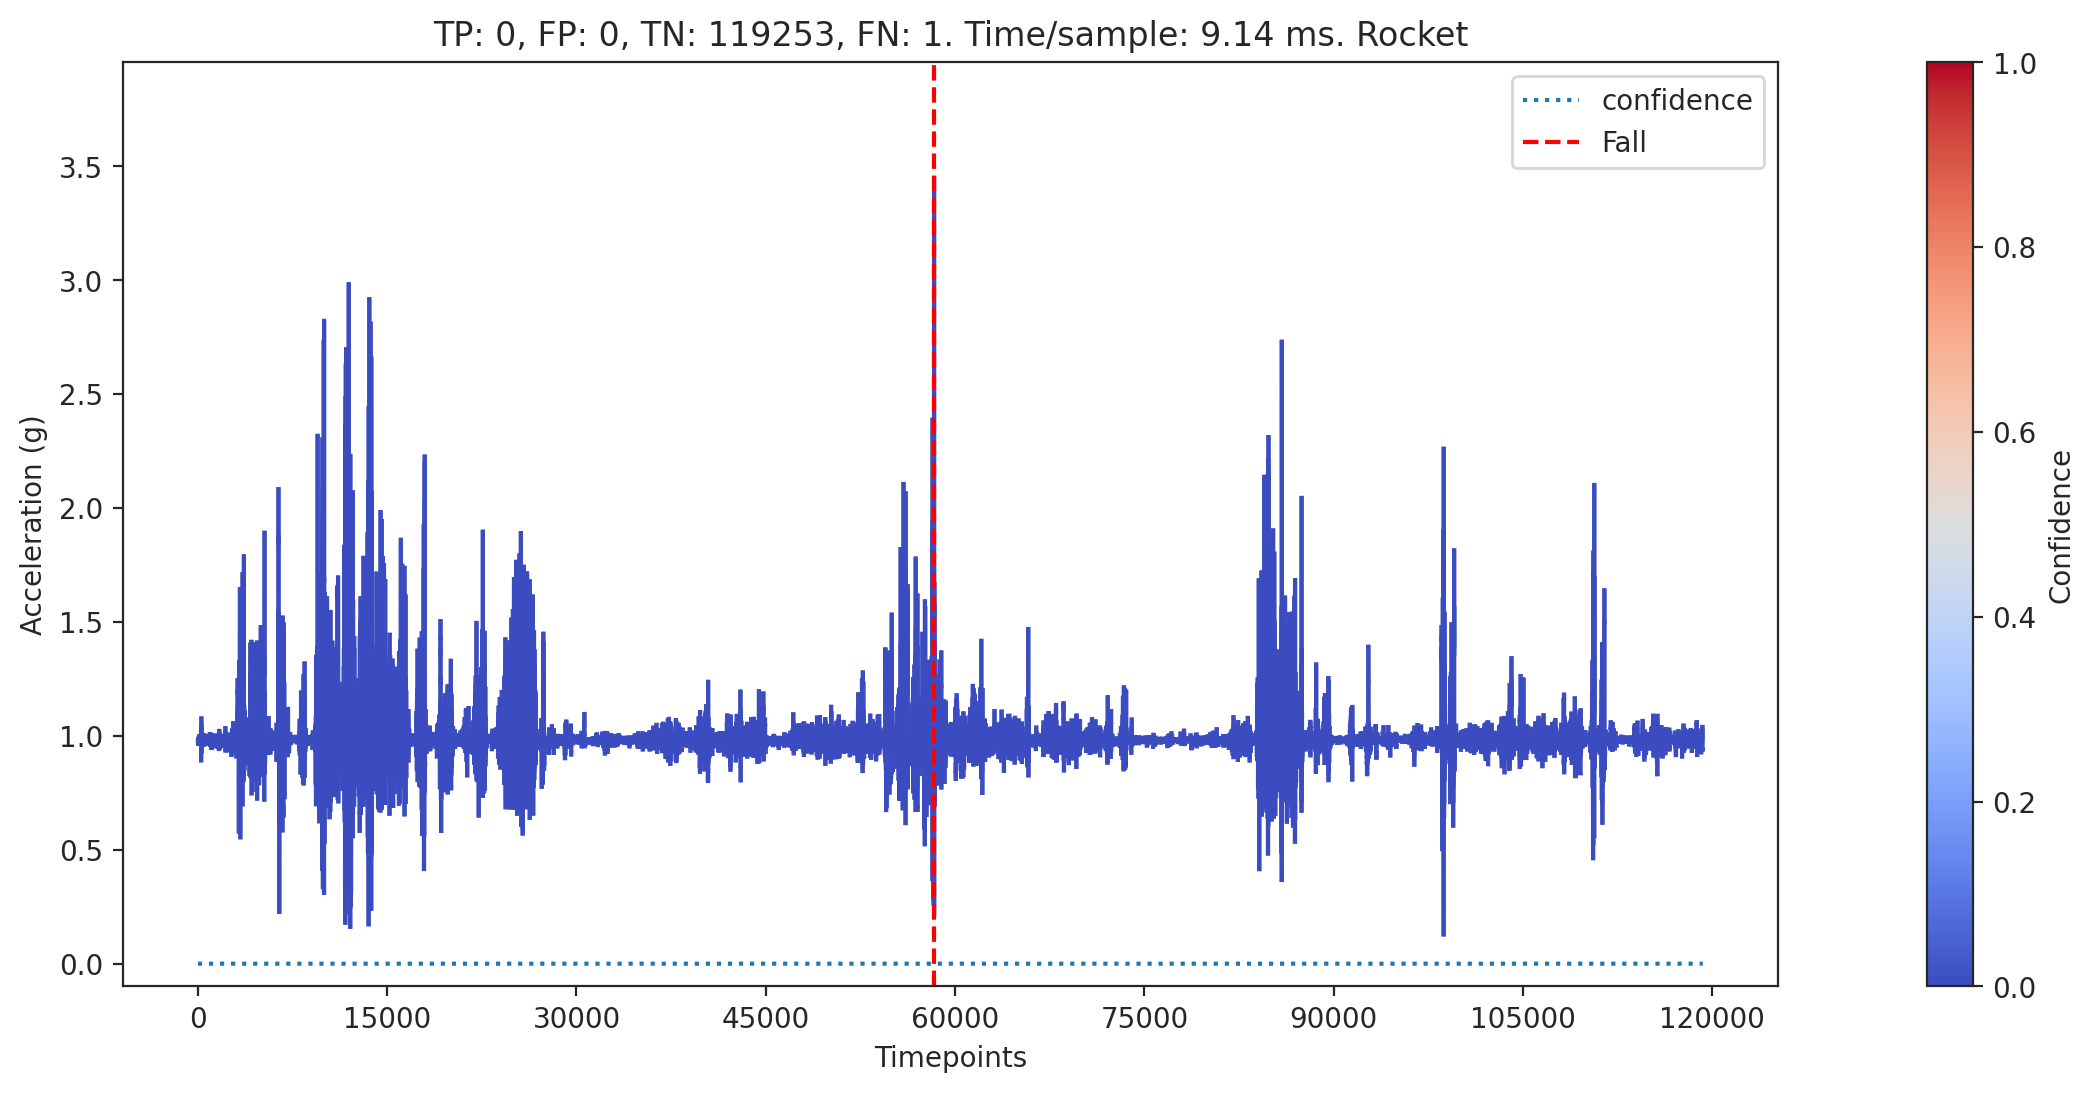

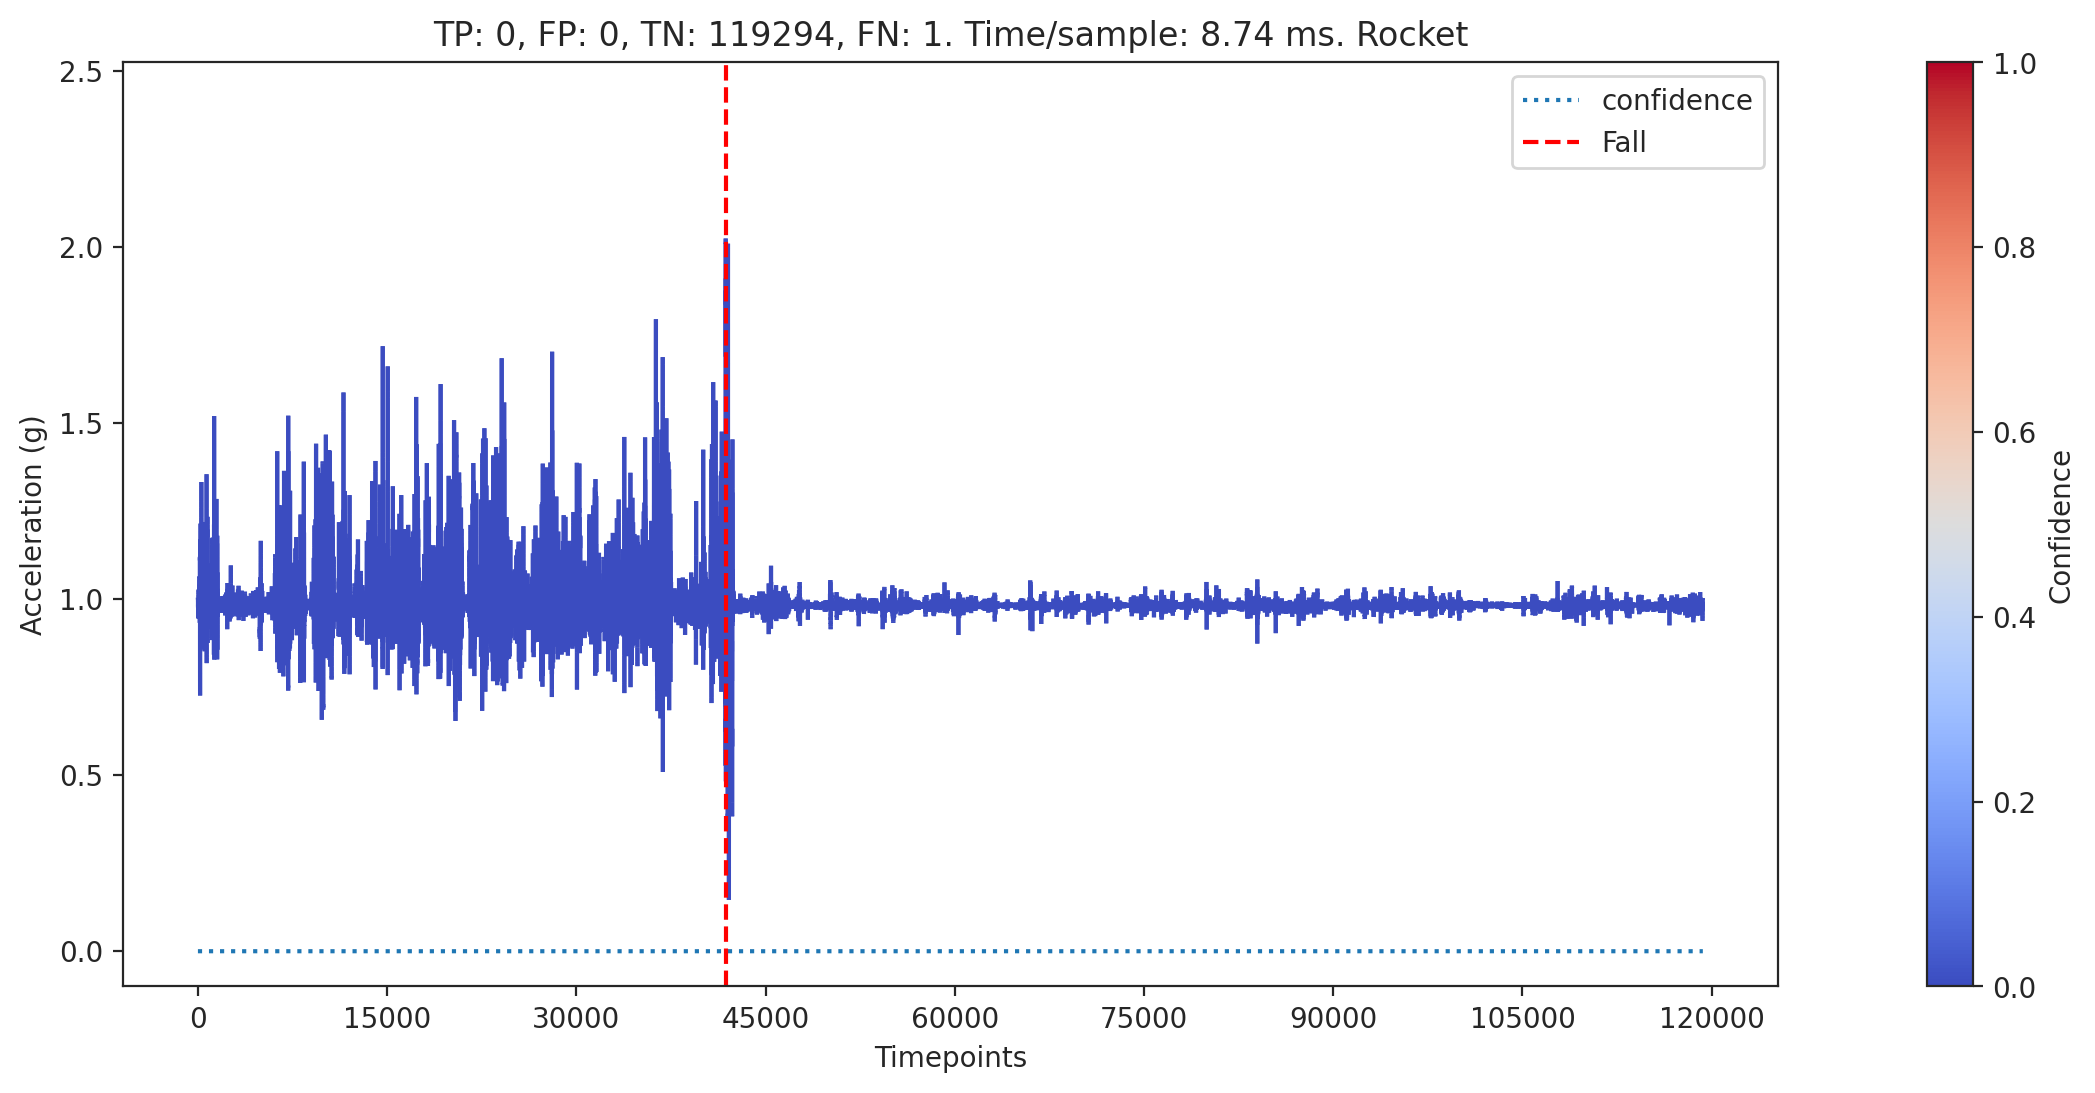

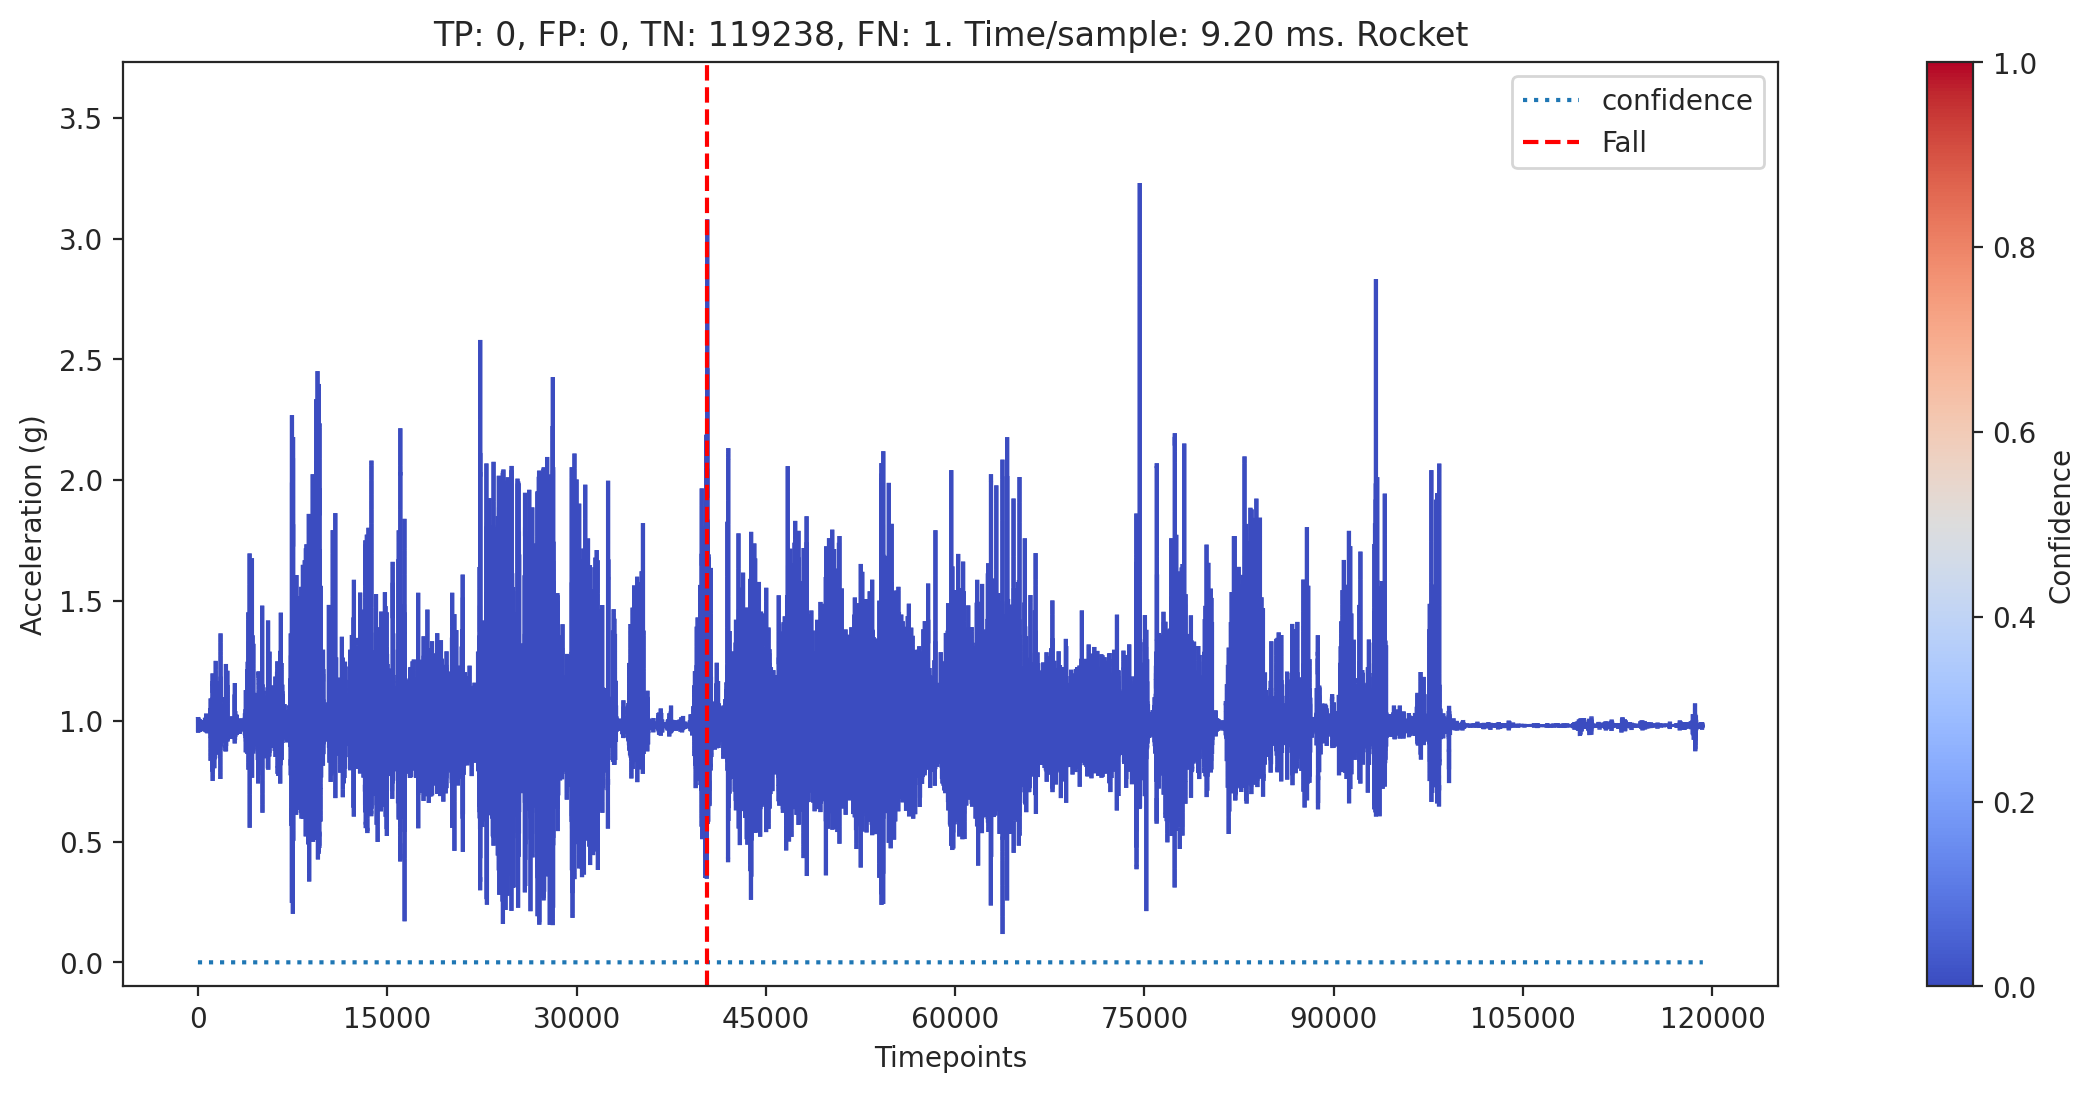

. Catch22

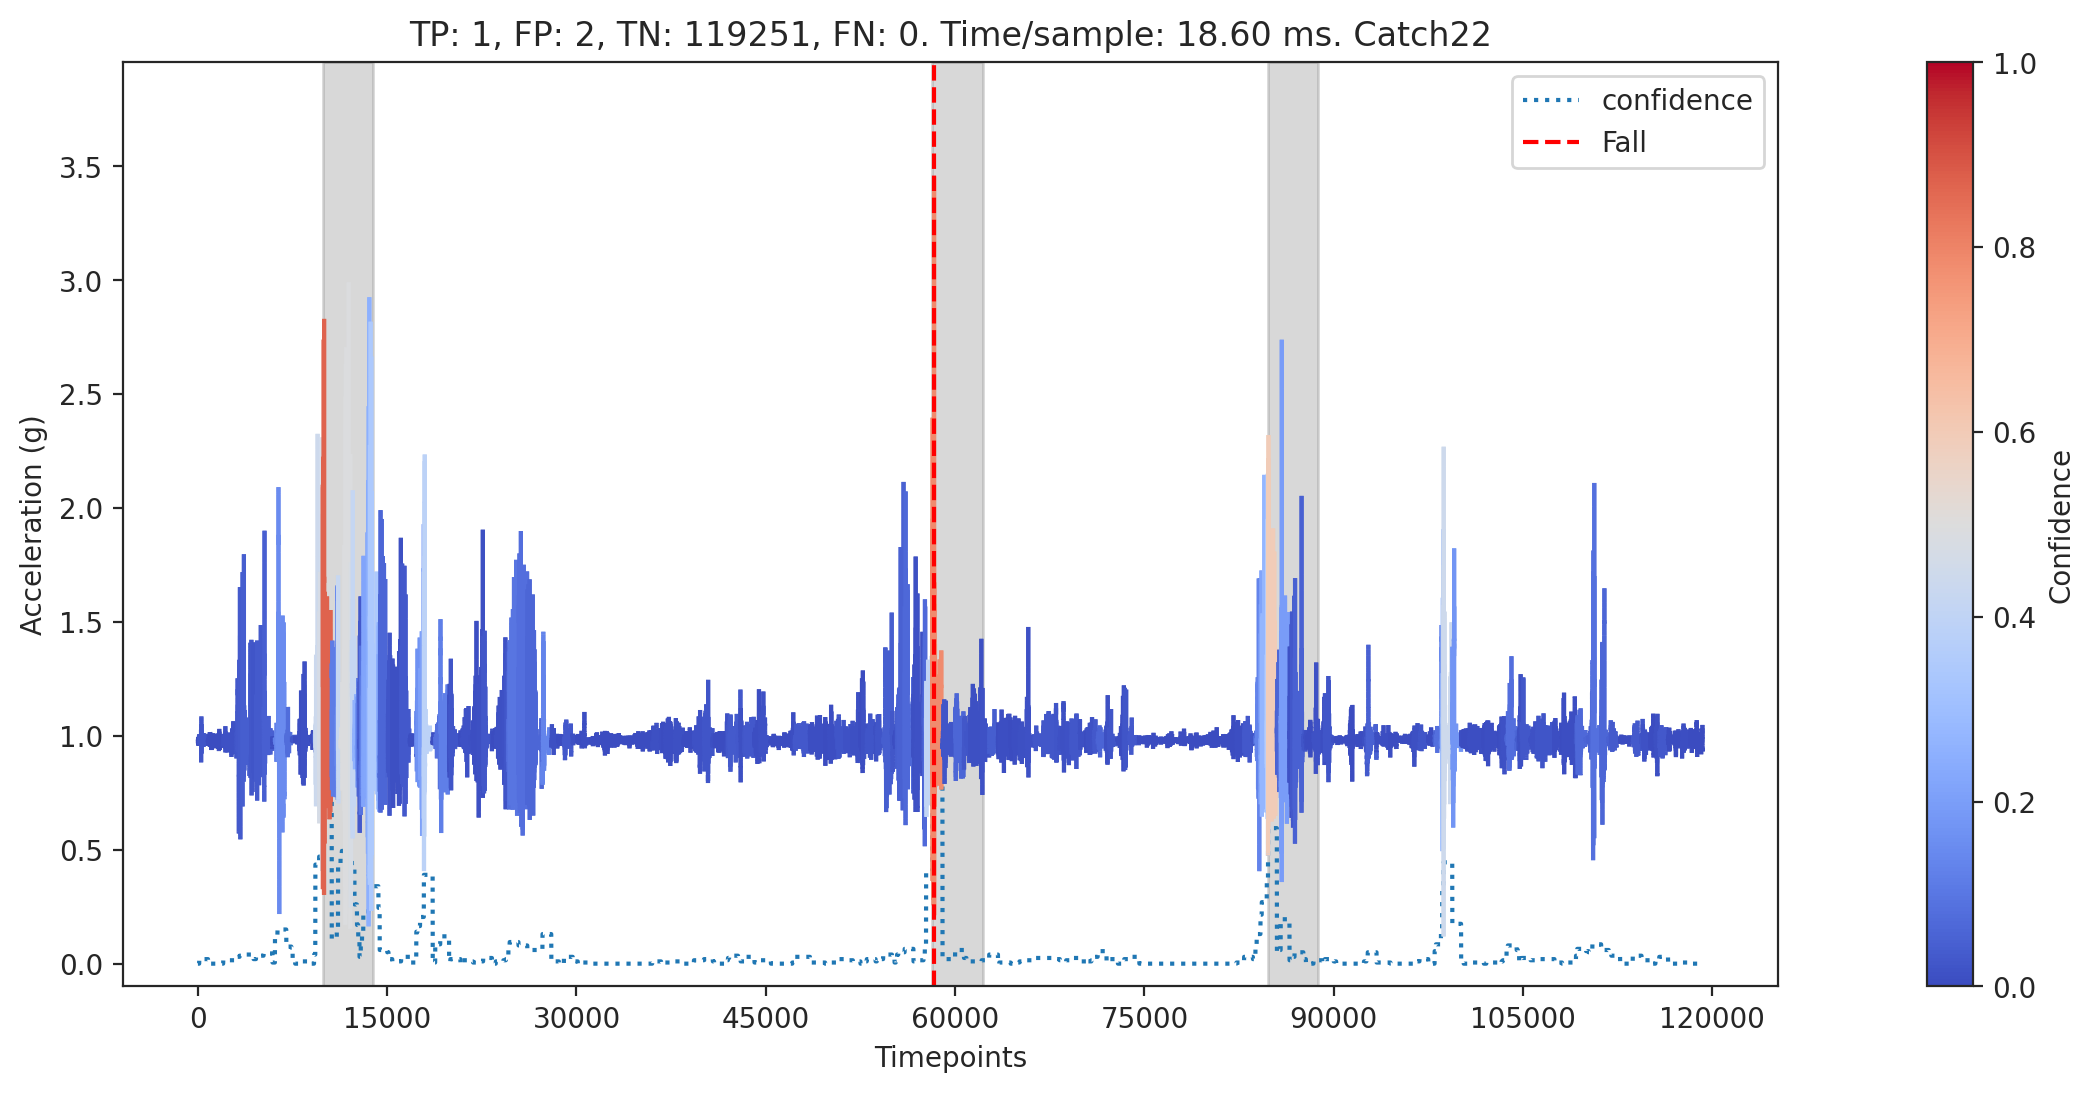

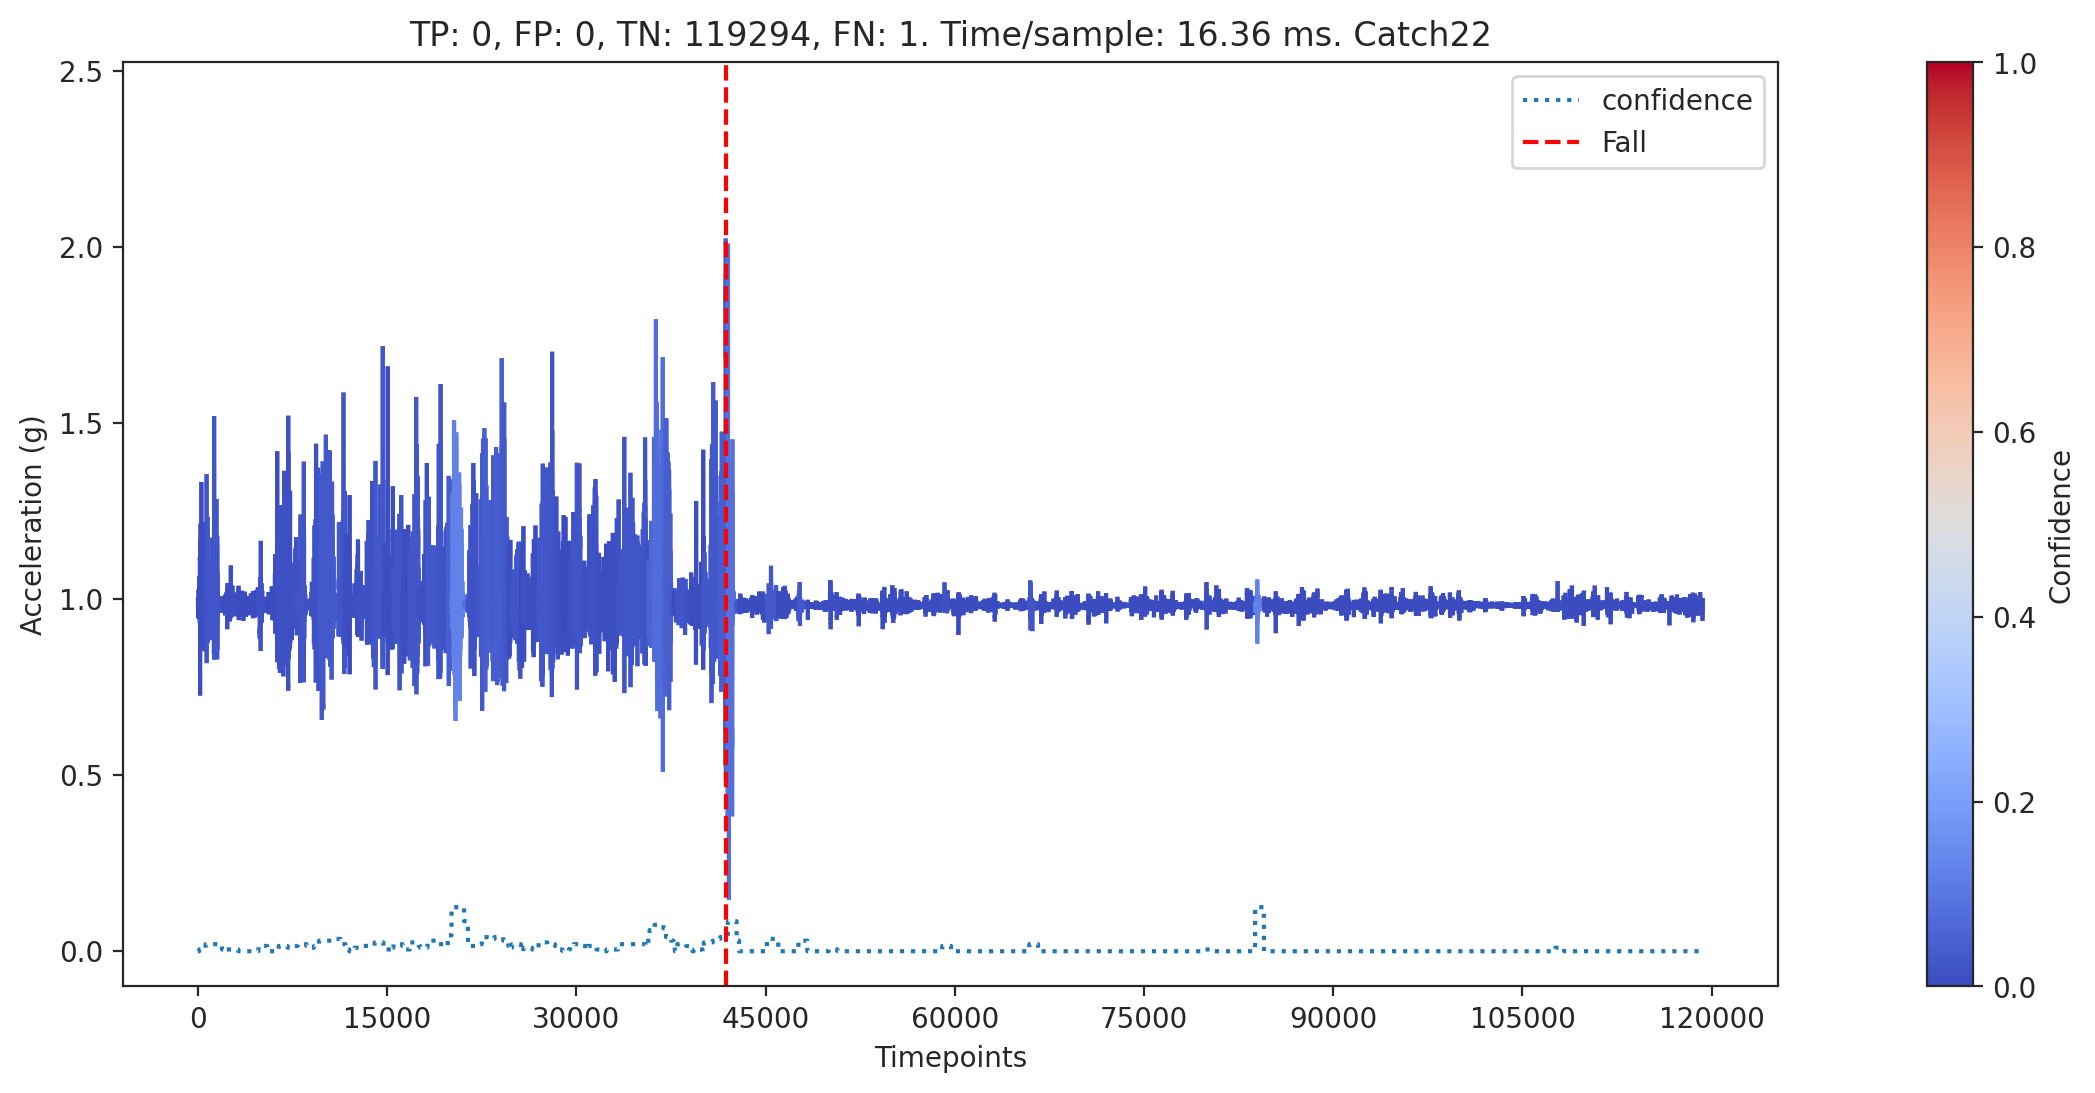

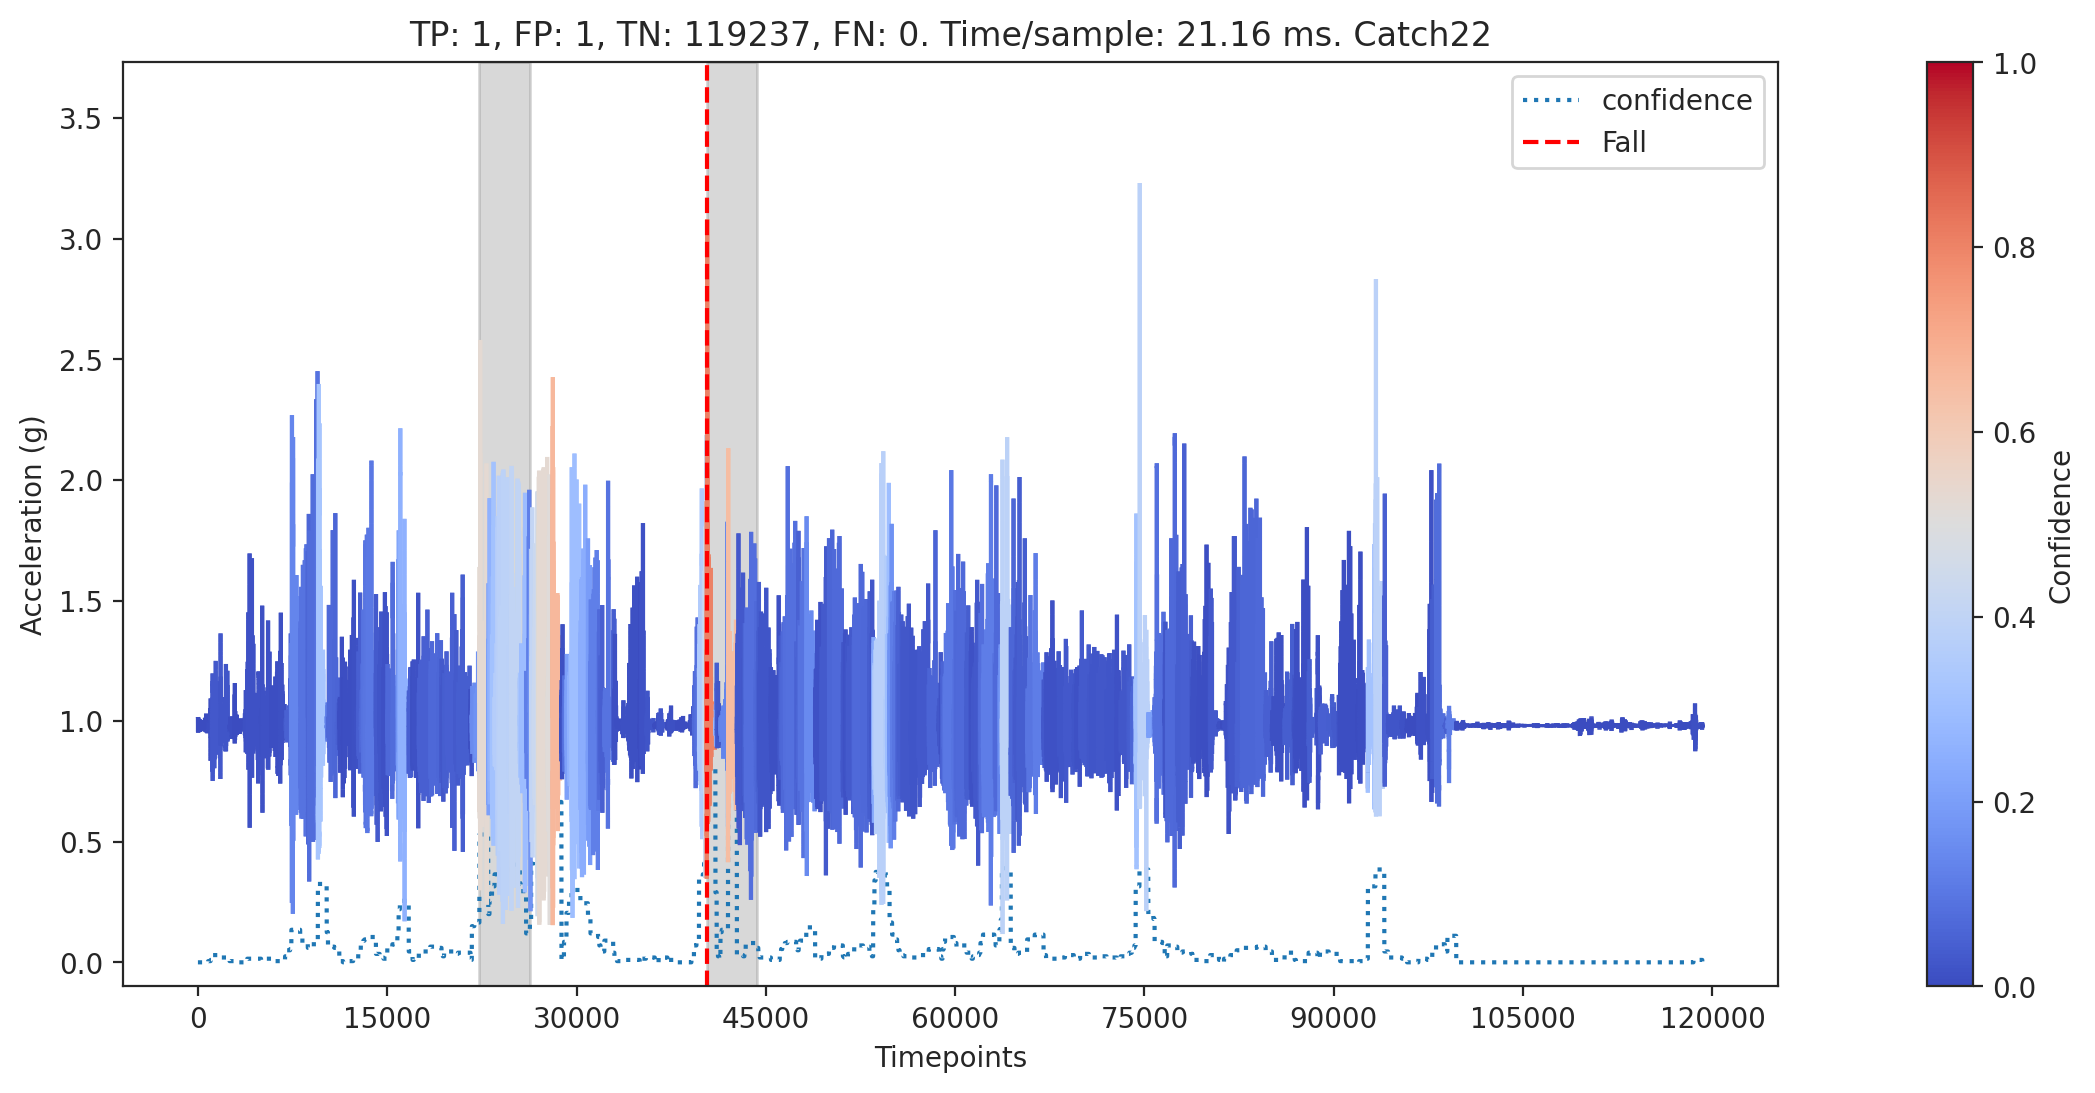

. QUANT

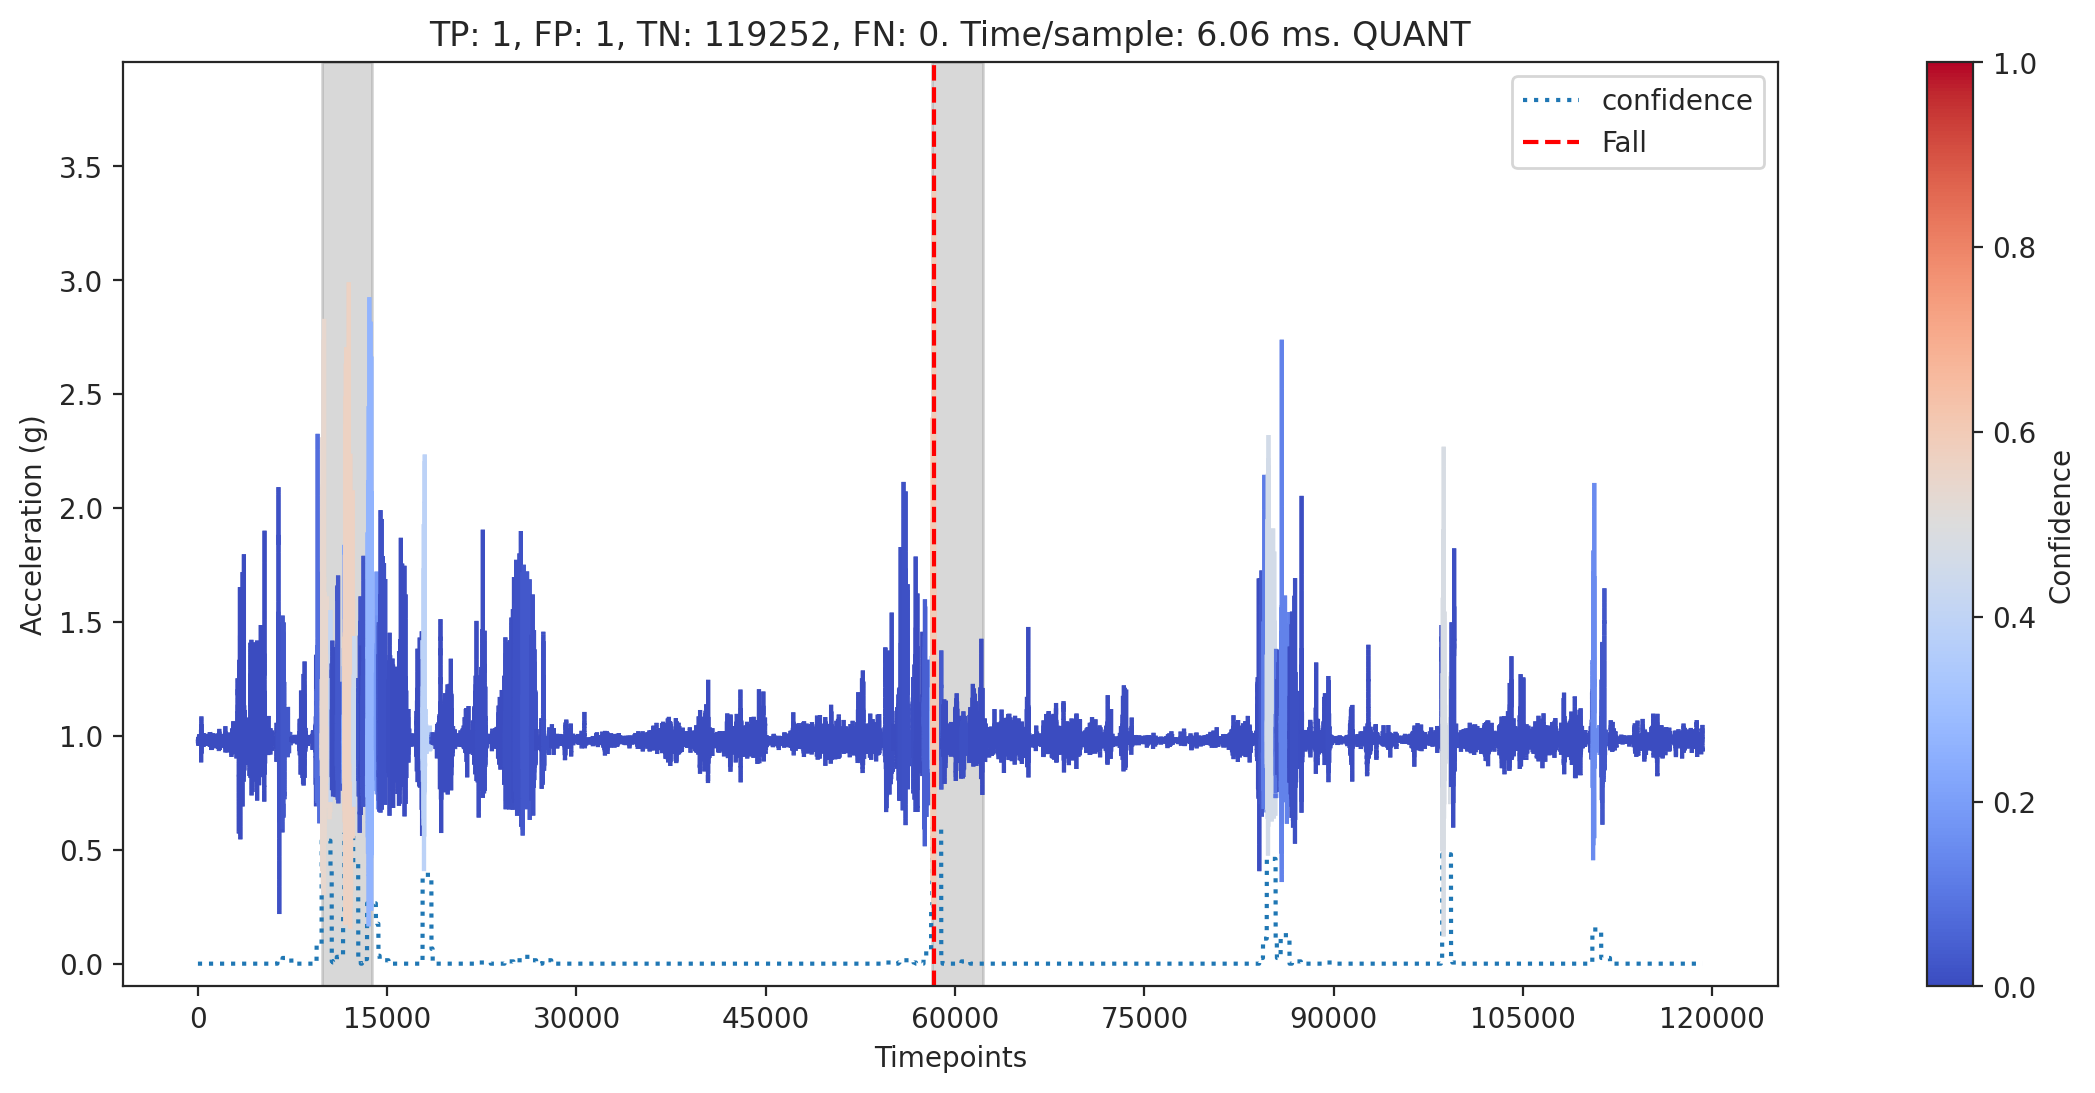

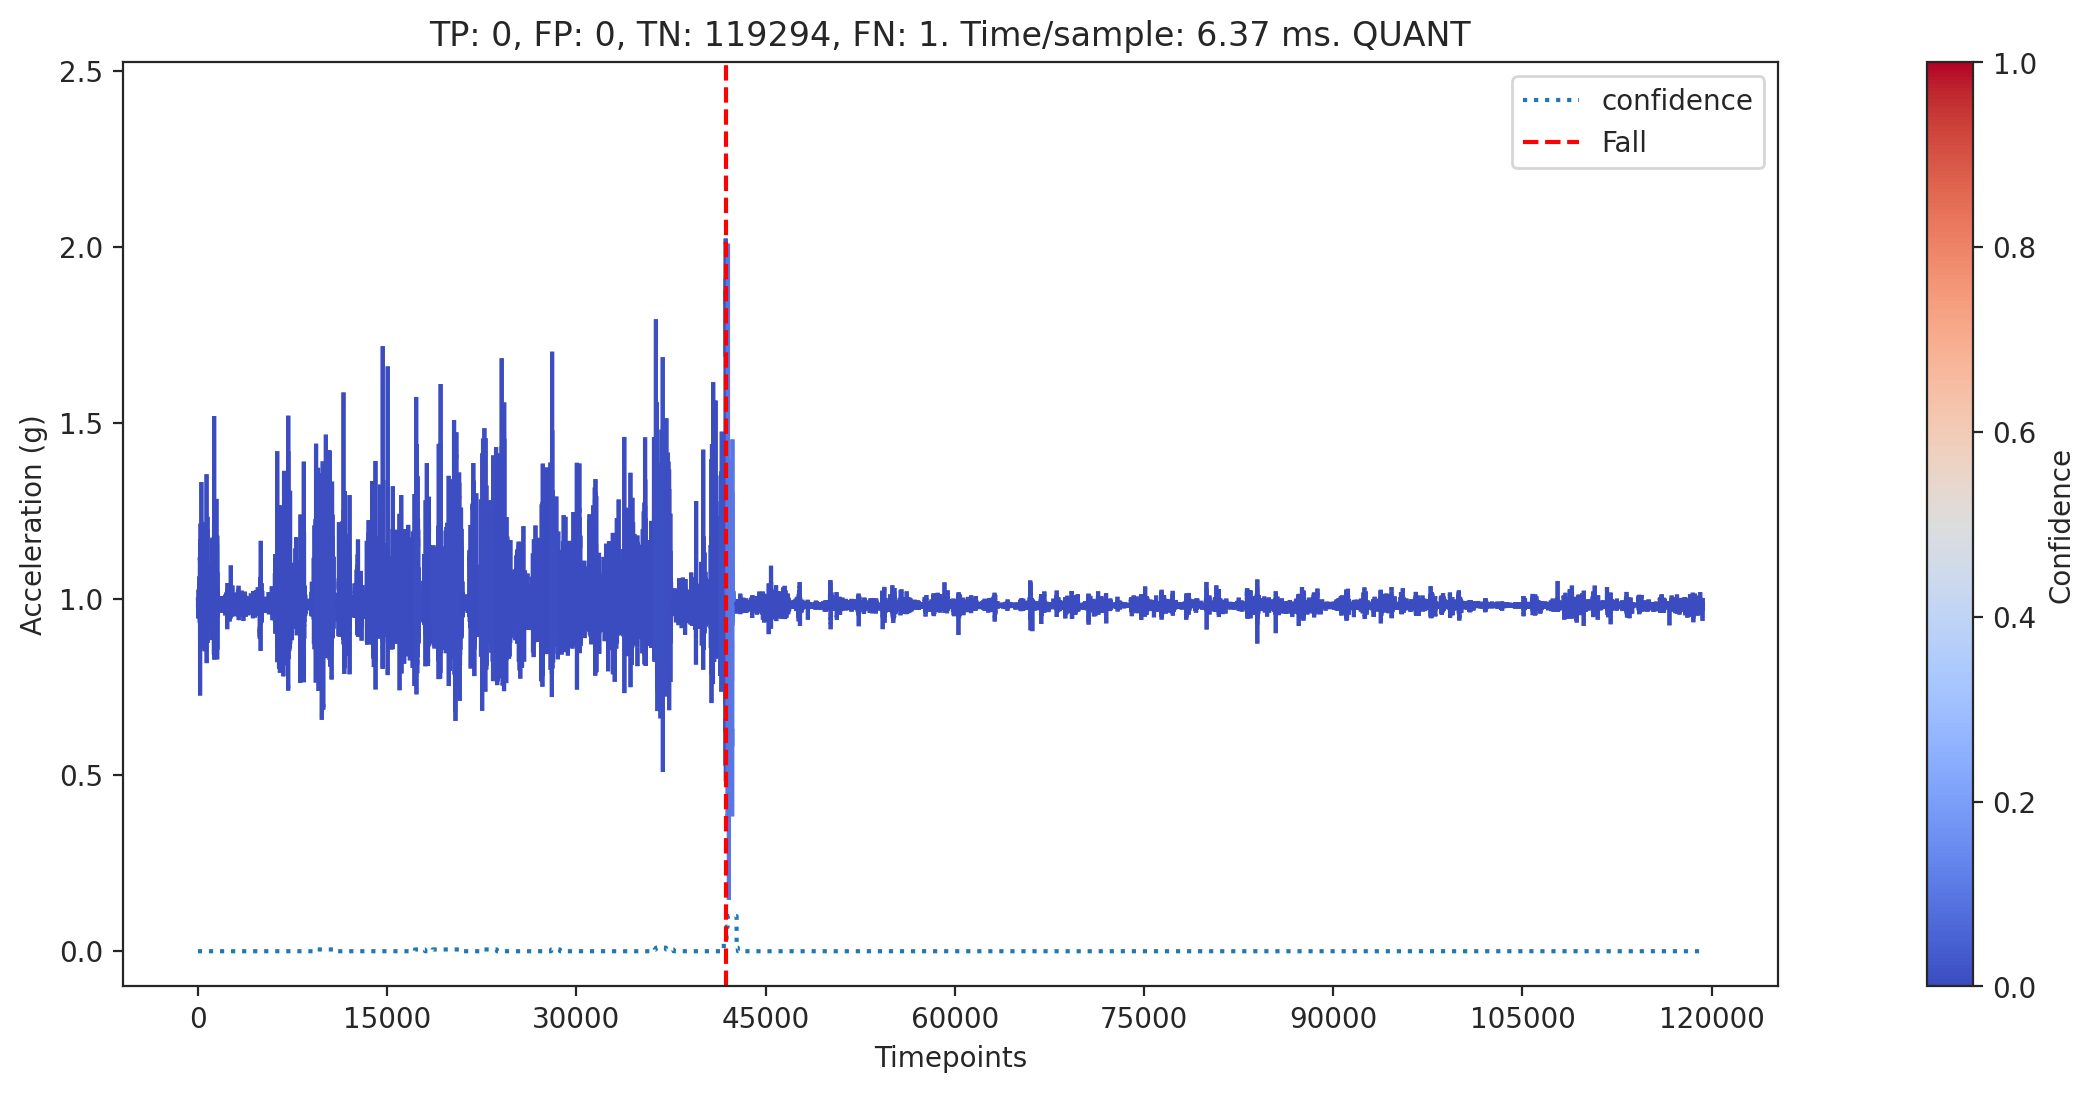

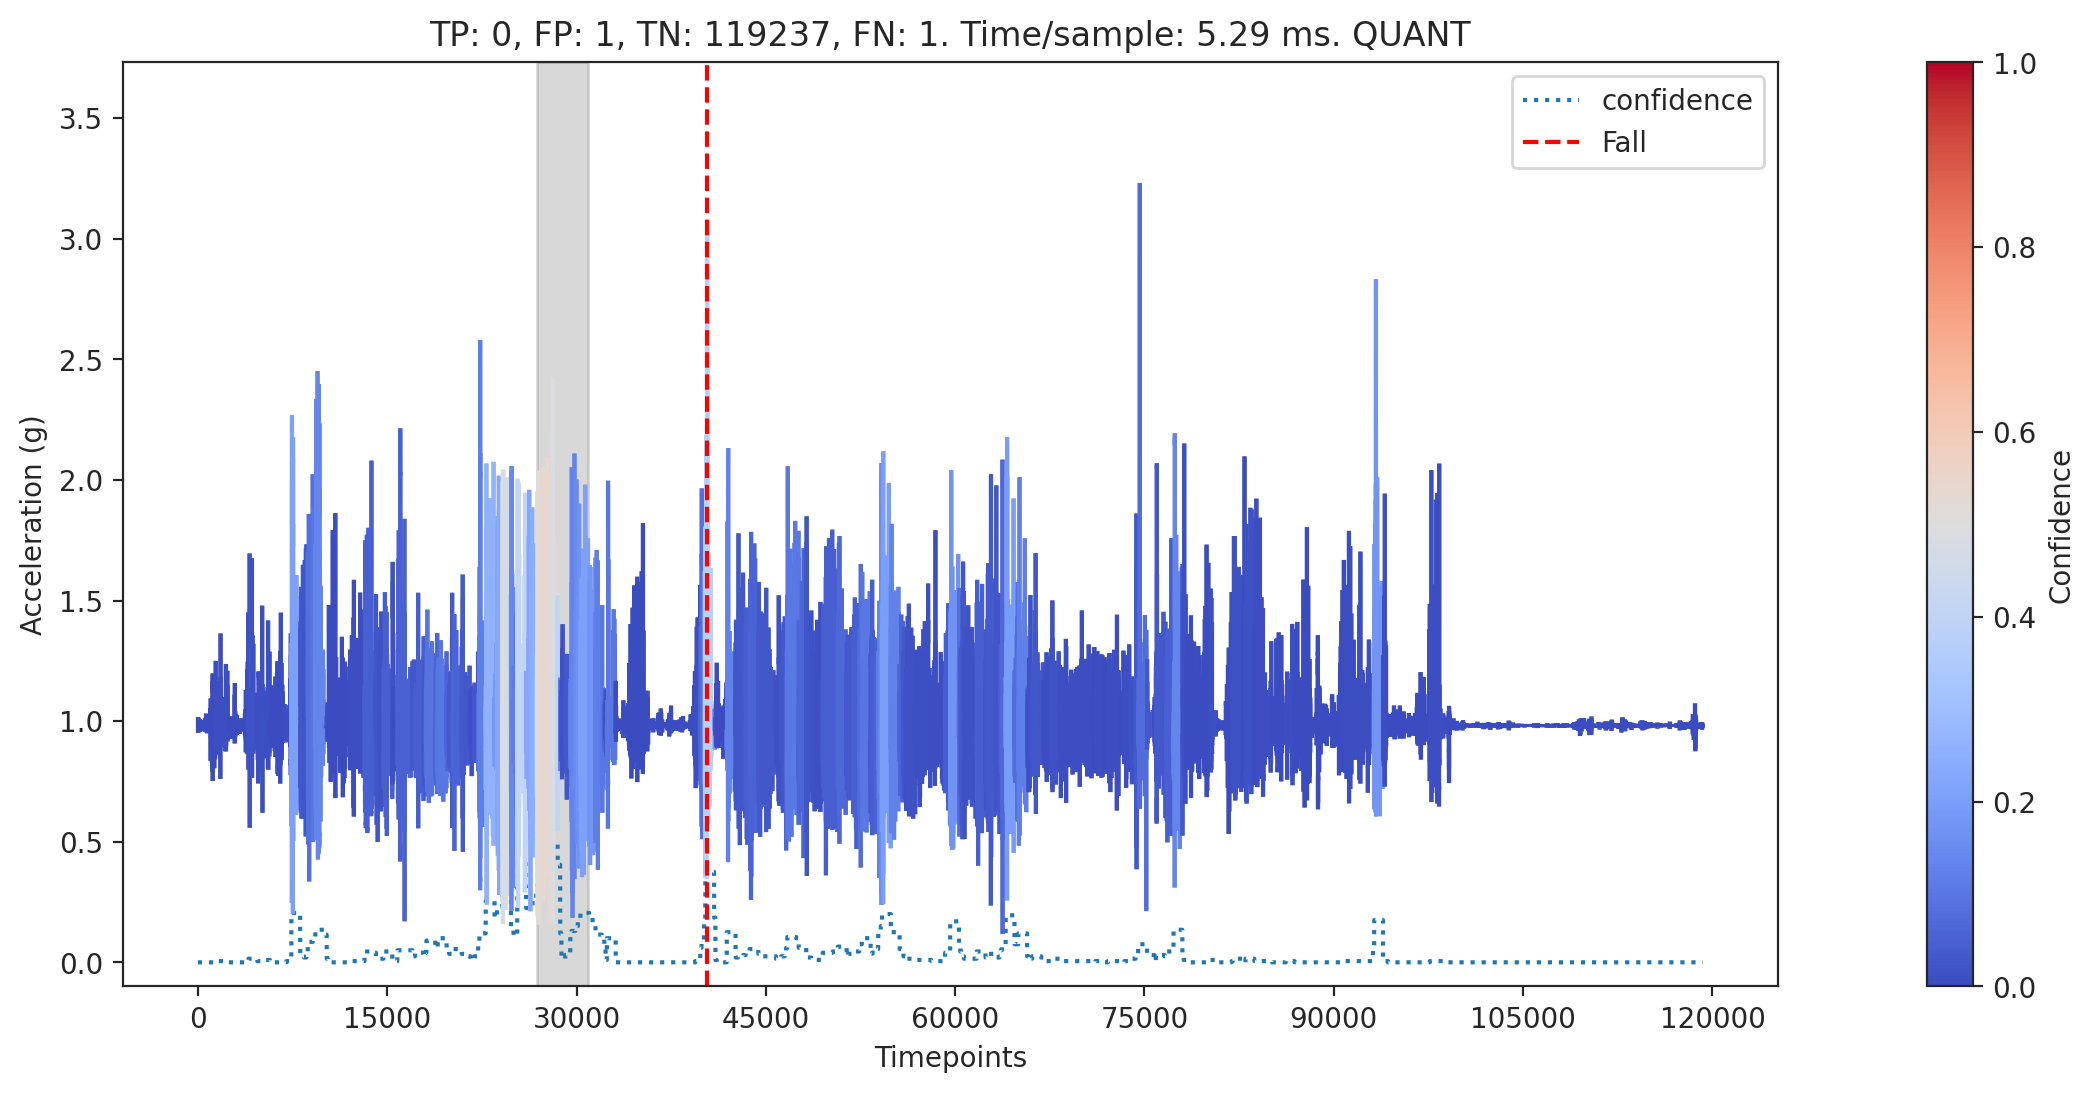

. Ensemble. ✅


In [92]:
kwargs.update(dict(tune_threshold=False, models_subset=None))
metrics_df = classifiers.run_models(X, X_test, y, y_test, **kwargs)

In [93]:
metrics_df

model  window_size    runtime       auc  precision    recall  \
0    LogisticCV            7   0.221532  0.499999       0.00  0.000000   
1  RandomForest            7   0.941878  0.500000       0.00  0.000000   
2    ExtraTrees            7   0.465393  0.500000       0.00  0.000000   
3        Rocket            7   9.196009  0.500000       0.00  0.000000   
4       Catch22            7  21.160017  0.833329       0.40  0.666667   
5         QUANT            7   5.292593  0.666664       0.33  0.333333   
6      Ensemble            7   5.292593  0.000000       0.00  0.000000   

   specificity  f1-score  false alarm rate  miss rate  
0     0.999997  0.000000          1.006132   3.018395  
1     1.000000  0.000000          0.000000   3.018395  
2     1.000000  0.000000          0.000000   3.018395  
3     1.000000  0.000000          0.000000   3.018395  
4     0.999992  0.500000          3.018395   1.006132  
5     0.999994  0.331658          2.012264   2.012264  
6     0.000000  0.000000          0.000000   0.000000

⏳ TRAINING QUANT. thresh: 0.20202020202020204 ✅
🔍 TESTING QUANT

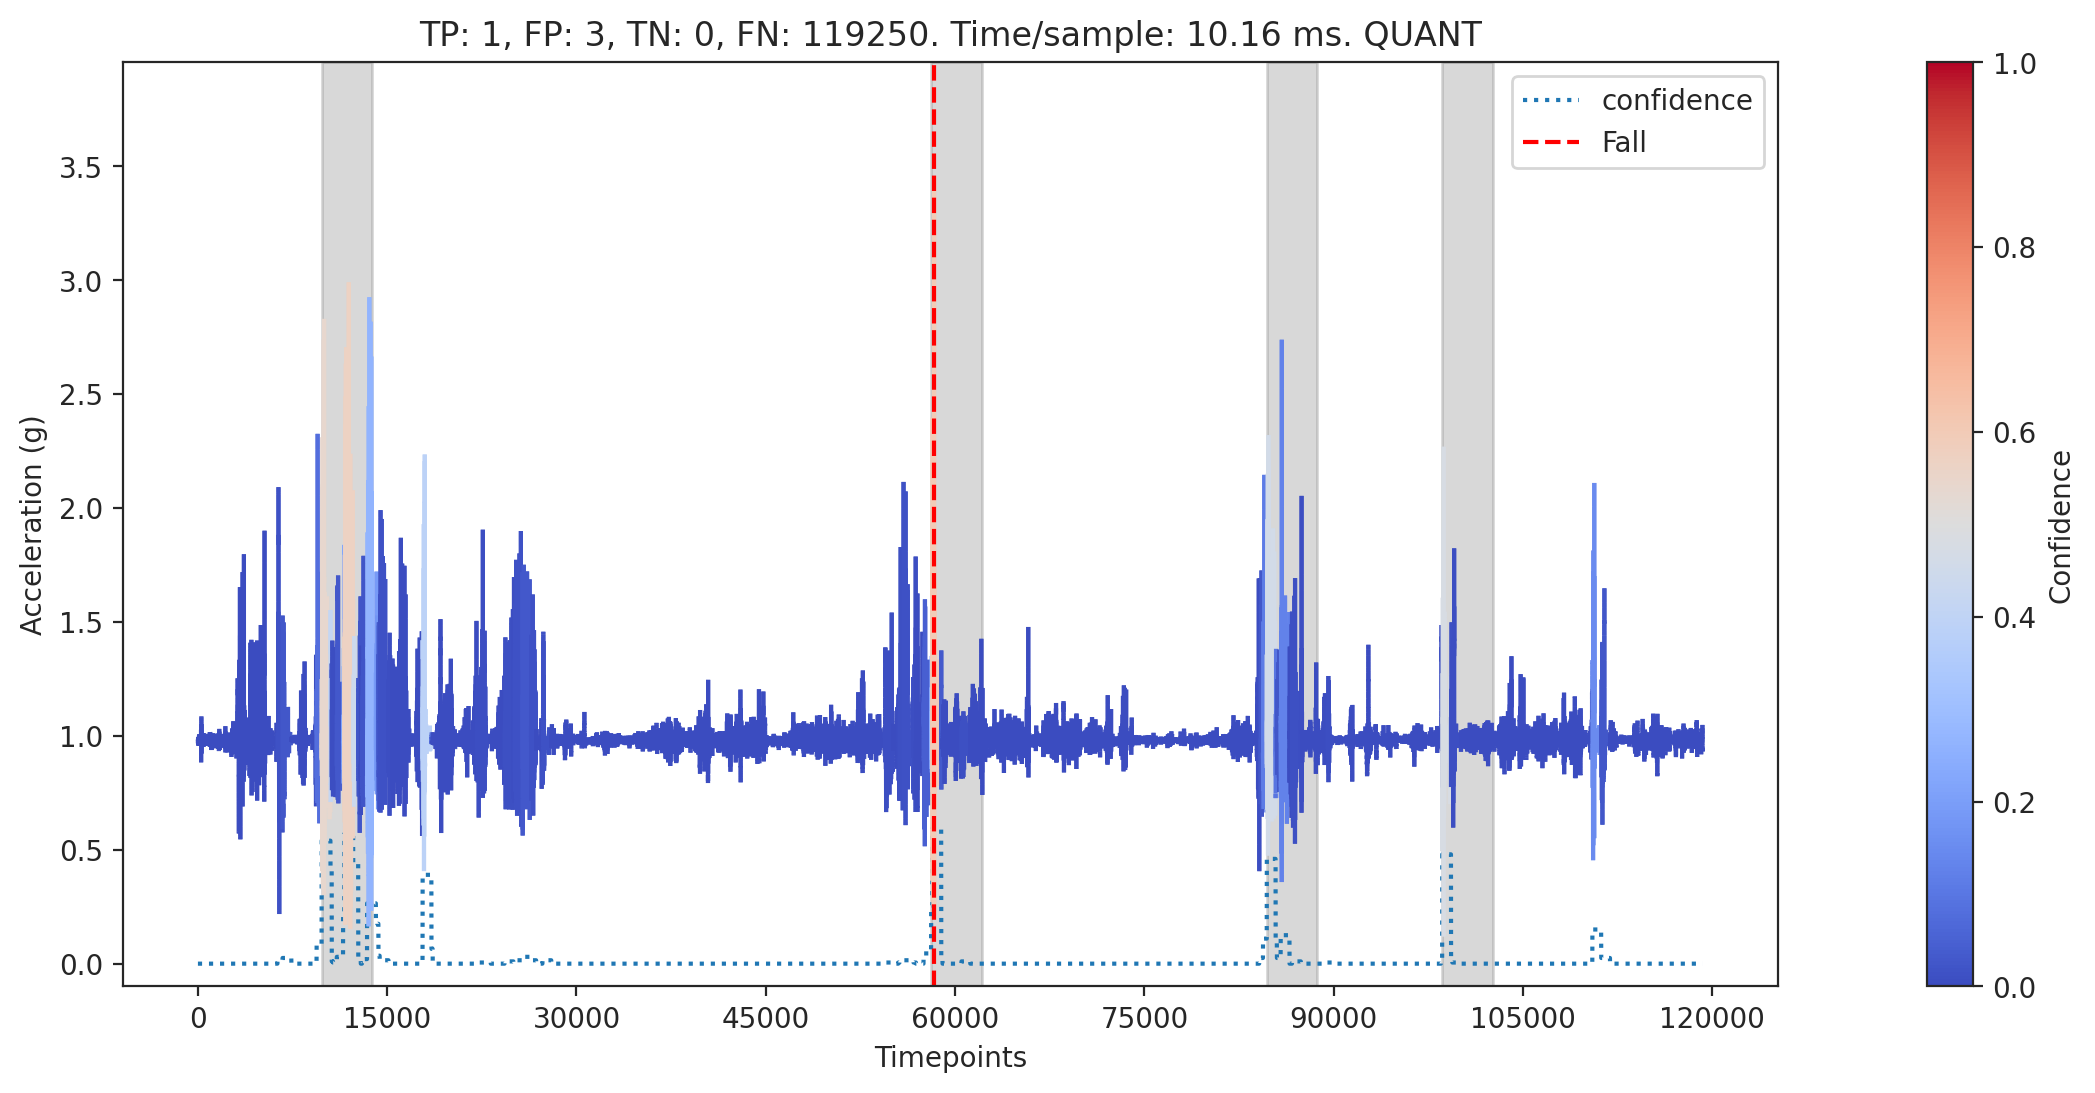

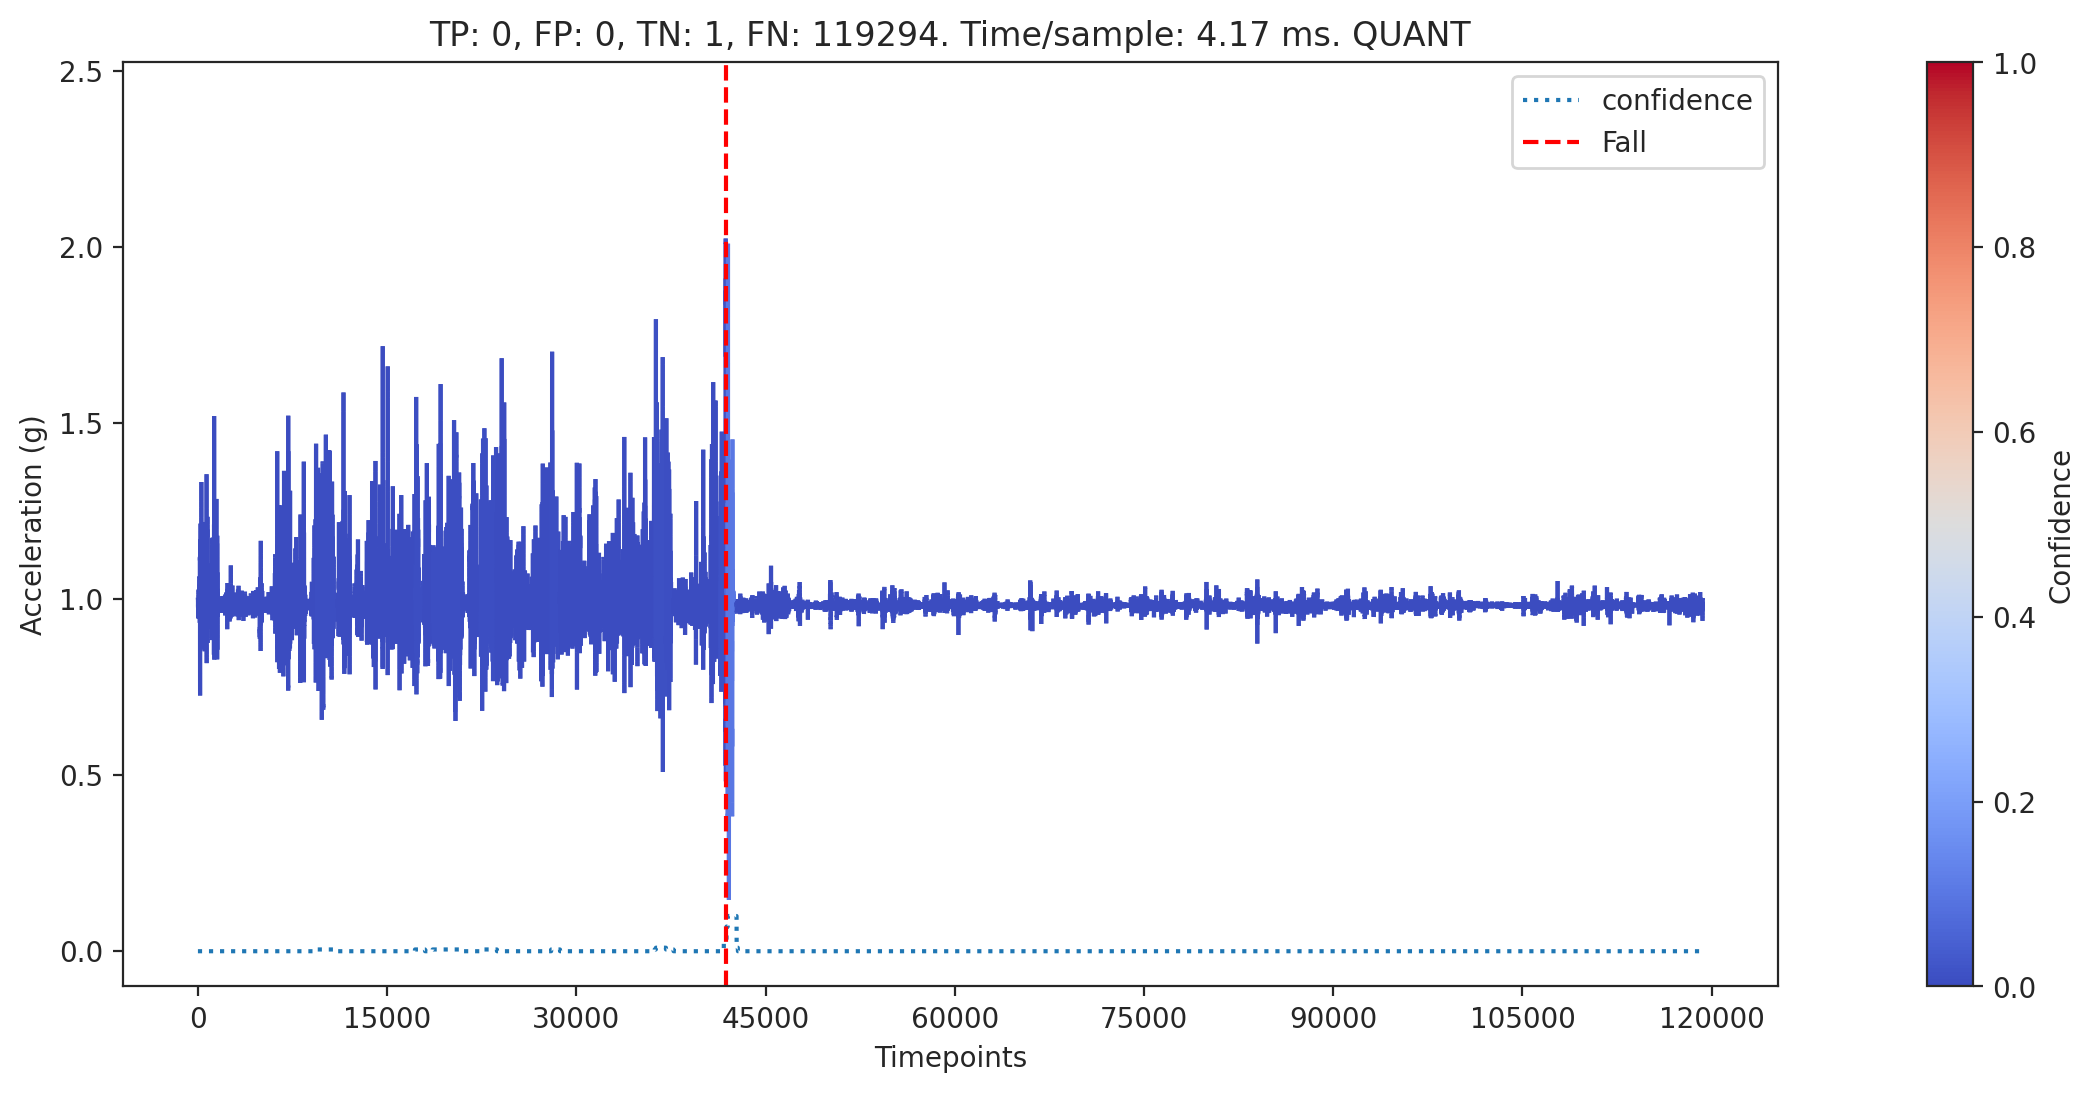

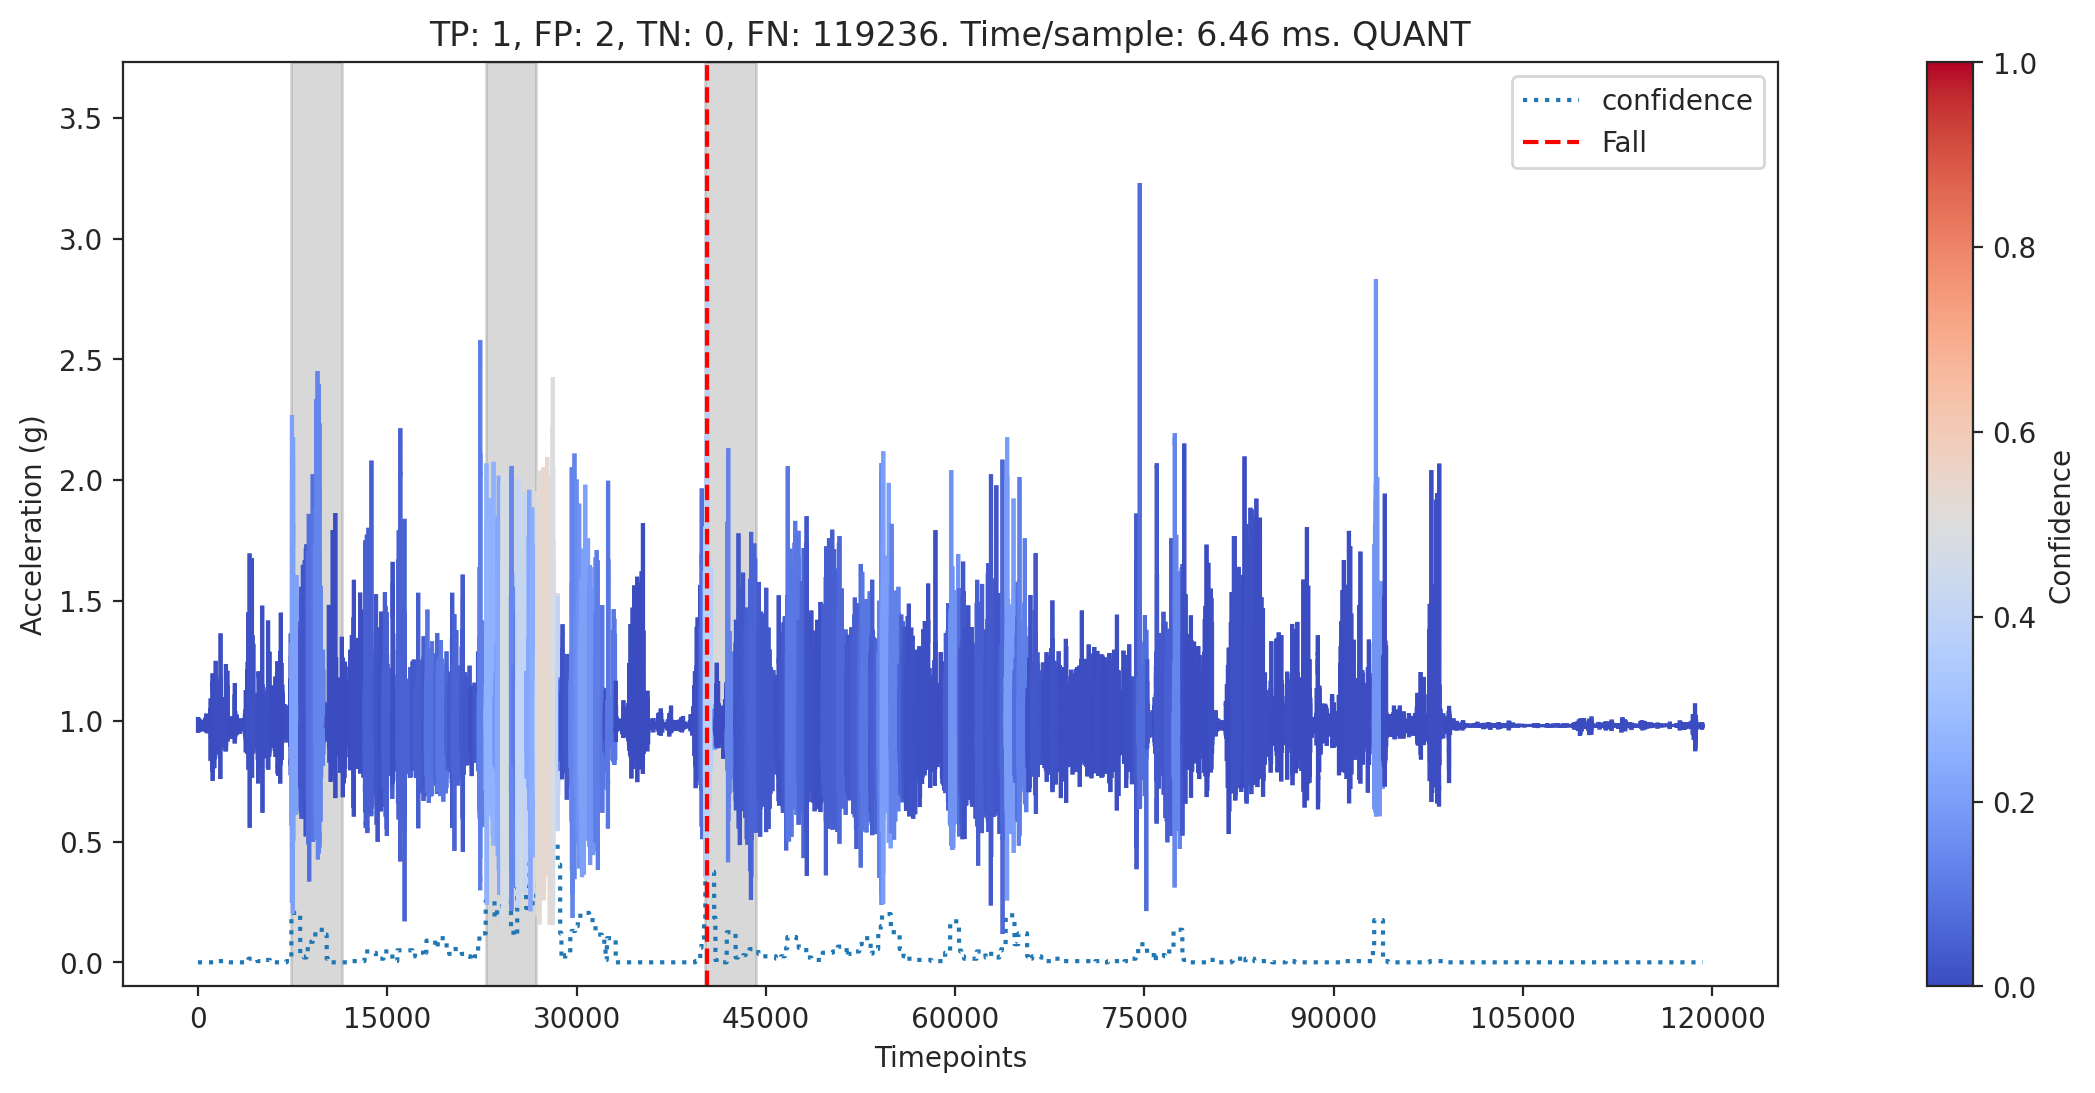

. Ensemble. ✅


In [97]:
kwargs.update(dict(tune_threshold=True, models_subset=['QUANT']))
metrics_df = classifiers.run_models(X, X_test, y, y_test, **kwargs)

In [98]:
metrics_df

model  window_size   runtime       auc  precision    recall  \
0     QUANT            7  6.460089  0.833326       0.29  0.666667   
1  Ensemble            7  6.460089  0.000000       0.00  0.000000   

   specificity  f1-score  false alarm rate  miss rate  
0     0.999986  0.404181          5.030659   1.006132  
1     0.000000  0.000000          0.000000   0.000000